In [2]:
import pandas as pd
#Load libraries
from sklearn.preprocessing import PowerTransformer
import numpy as np
from kmodes.kprototypes import KPrototypes
#Load libraries
from matplotlib import style
from lightgbm import LGBMClassifier
import shap
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Load library
from sklearn.preprocessing import LabelEncoder
import os
import random

In [3]:
#Import dataset for supervised clustering
df_sup = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/Final/sup_df_all_processed.csv', low_memory=False)

In [18]:
df_sup.head(5)

,Unnamed: 0,Unnamed: 0.1,Biomarker.C5a.pg.ml.serum,Biomarker.CD40L.pg.ml.serum,Biomarker.DPPIV.pg.ml.serum,Biomarker.Galectin.3.pg.ml.serum,Biomarker.IL.18.pg.ml.serum,Biomarker.IL.1alpha.pg.ml.serum,Biomarker.IL.6Ralpha.pg.ml.serum,Biomarker.LBP.pg.ml.serum,Biomarker.MCP.4.pg.ml.serum,Biomarker.MMP.3.pg.ml.serum,Biomarker.RAGE.pg.ml.serum,Biomarker.SHBG.pg.ml.serum,Biomarker.Serpin.E1.pg.ml.serum,Biomarker.alpha1.microglobulin.pg.ml.serum,Biomarker.CCL17.pg.ml.MSD.BL.plasma,Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma,Biomarker.Baseline.BI.Cytokines.Chemokines.IL6.pg.ml.MSD.BL.plasma,Biomarker.MCP1.pg.ml.MSD.BL.plasma,Biomarker.MIP1b.pg.ml.MSD.BL.plasma,Biomarker.TNFa.pg.ml.MSD.BL.plasma,Biomarker.Genentech.CCL18.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.IL13.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.Periostin.ng.ml.ELECSYS.BL.serum,Biomarker.Karolinska.hsCRP.hCRP.mg.L,Clinical.Atopy.Total.IgE.IU.ml,Clinical.NO.Standard.Flow.Rate,Clinical.Screening.Albumin.g.dL,Clinical.Screening.Alkaline.Phosphatase.U.L,Clinical.Screening.Alt.U.L.,Clinical.Screening.Ast.U.L,Clinical.Screening.Blood.Urea.Nitrogen.mg.dL,Clinical.Screening.Creatinine.umol.L,Clinical.Screening.Gamma.Gt.U.L,Clinical.Screening.Lymphocytes,Clinical.Screening.Monocytes,Clinical.Screening.Platelets.x10.3.uL,Clinical.Screening.Sodium.mmol.L,Clinical.Screening.Total.Bilirubin.umol.L,Clinical.Screening.Total.Protein.g.dL,Clinical.Screening.Wbcs.x10.3.uL,Clinical.Screening.lymphocytes.x10.3.uL,Clinical.FEF.25.75.Absolute.Change.L.sec,Clinical.FEV1.FVC.Ratio.Predicted.LLN,Clinical.FVC.Absolute.Change.L,Clinical.Baseline.PEF,Clinical.Screening.Diastolic.Blood.Pressure,Clinical.Screening.Heart.Rate,Clinical.Screening.Respiratory.Rate,Clinical.Screening.Systolic.Blood.Pressure,Exacerbation.Per.Year.,Omics.dehydroTXB2.ng.mmolC,Omics.dinor.11.B.PGF2a.ng.mmolC,Omics.dinor.8.isoPGF2a.ng.mmolC,Omics.dinor.TXB2.ng.mmolC,Omics.isoPGF2a.ng.mmolC,Omics.LTE4.ng.mmolC,Omics.PGF2a.ng.mmolC,Omics.tetranorPGDM.ng.mmolC,Omics.tetranorPGEM.ng.mmolC,Omics.Trimethyluric.acid,Omics.Dimethyluric.acid,Omics.Methyluric.acid,Omics.Methylxanthine,Omics.Acetylamino.6.formylamino.3.methyluracil,Omics.Acetylcarnitine,Omics.Carnitine,Omics.Galacturonic.acid,Omics.Glutamine,Omics.Guanine,Omics.Histidine,Omics.Kynurenic.acid,Omics.Maltose,Omics.Mannitol,Omics.Methionine,Omics.Methylthioadenosine,Omics.N.Acetylcarnosine,Omics.N.Acetylglutamic.acid,Omics.N.Acetylputrescine,Omics.N.Methyl.D.aspartic.acid,Omics.N.Methylhistamine,Omics.Pipecolic.acid,Omics.Propionylcarnitine,Omics.S.Adenosylhomocysteine,Omics.Saccharopine,Omics.Sarcosine,Omics.Serine,Omics.Serotonin,Omics.Sucrose,Omics.Uracil,Omics.Xylose,Questionnaires.ACQ.FEV1.Precentage,Questionnaires.AQLQ.Emotional.Total.Imputed,Questionnaires.ESS.Total.Imputed,Questionnaires.HADS.Anxiety.Total.Imputed,Questionnaires.HADS.Depression.Total.Imputed,Questionnaires.SNOT.Total.Imputed,Body.Mass.Index.kg.m2,Height.cm,Respiratory.History.Onset.OR.First.Diagnosis.Age.years,Clinical.Screening.Haematology.Not.Done,Age,Sputum.._Eosinophils,Blood.Neutrophils_.,Sputum._Neutrophils,Blood.Eosinophils_.,Omics.Proteomics.Serum,Questions.Screening.Asthma.Father,Questions.Screening.Hay.Fever.Mother,Questions.Screening.Inflammatory.Disease.Father,Hay.Fever.Diagnosed,Non.Allergic.Rhinitis.Diagnosed,Parental.Asthma,Sex,cohort,cluster_K_2,cluster_K_3,cluster_K_4,cluster_K_5,cluster_K_6,cluster_K_7,cluster_K_8,cluster_K_9,cluster_K_10,cluster_K_11,cluster_K_12,cluster_K_13,cluster_K_14,cluster_K_15,Healthy,MildModerate,Severe,Severe_Smoker,Severe_asthma
0,0,A_151,-0.724095,0.863080,0.252664,-1.766019,0.001351,-0.210162,-1.539914,-1.036255,-0.107821,-1.245209,2.965697,0.032570,-1.013383,0.186077,-2.172842,0.930240,-0.789349,-0.438213,-1.522596,0.982285,-1.020478,-0.578457,-0.315207,-1.159050,1.231261,-1.181340,0.552621,-0.040440,-0.192761,-0.079863,0.388968,0.187291,0.857627,0.152694,0.237446,-0.240586,0.137042,-0.024990,-0.908405,-0.382681,-0.604908,0.744726,1.405463,1.416039,0.495466,

In [5]:
#Check variable types for specific columns using:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_sup.iloc[:,112:135].dtypes

Non.Allergic.Rhinitis.Diagnosed    float64
Parental.Asthma                    float64
Sex                                float64
cohort                              object
cluster_K_2                          int64
cluster_K_3                          int64
cluster_K_4                          int64
cluster_K_5                          int64
cluster_K_6                          int64
cluster_K_7                          int64
cluster_K_8                          int64
cluster_K_9                          int64
cluster_K_10                         int64
cluster_K_11                         int64
cluster_K_12                         int64
cluster_K_13                         int64
cluster_K_14                         int64
cluster_K_15                         int64
Healthy                             object
MildModerate                        object
Severe                              object
Severe_Smoker                       object
Severe_asthma                       object
dtype: obje

In [8]:
#Drop a few columns from df_sup to run k-prototypes (K=2 to 10)
df_sup_proto = df_sup.drop(['cluster_K_2','cohort','cluster_K_3','cluster_K_4','cluster_K_5','cluster_K_6','cluster_K_7','cluster_K_8','cluster_K_9','cluster_K_10','cluster_K_11','cluster_K_12','cluster_K_13','cluster_K_14','cluster_K_15','Healthy','Severe','Severe_Smoker','Severe_asthma','MildModerate','Unnamed: 0',
                           'Omics.Maltose','Omics.N.Acetylglutamic.acid','Omics.N.Methyl.D.aspartic.acid','Omics.Sarcosine','Omics.N.Acetylputrescine'], axis = 1)

In [9]:
df_sup_proto.head(5)

,Unnamed: 0.1,Biomarker.C5a.pg.ml.serum,Biomarker.CD40L.pg.ml.serum,Biomarker.DPPIV.pg.ml.serum,Biomarker.Galectin.3.pg.ml.serum,Biomarker.IL.18.pg.ml.serum,Biomarker.IL.1alpha.pg.ml.serum,Biomarker.IL.6Ralpha.pg.ml.serum,Biomarker.LBP.pg.ml.serum,Biomarker.MCP.4.pg.ml.serum,Biomarker.MMP.3.pg.ml.serum,Biomarker.RAGE.pg.ml.serum,Biomarker.SHBG.pg.ml.serum,Biomarker.Serpin.E1.pg.ml.serum,Biomarker.alpha1.microglobulin.pg.ml.serum,Biomarker.CCL17.pg.ml.MSD.BL.plasma,Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma,Biomarker.Baseline.BI.Cytokines.Chemokines.IL6.pg.ml.MSD.BL.plasma,Biomarker.MCP1.pg.ml.MSD.BL.plasma,Biomarker.MIP1b.pg.ml.MSD.BL.plasma,Biomarker.TNFa.pg.ml.MSD.BL.plasma,Biomarker.Genentech.CCL18.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.IL13.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.Periostin.ng.ml.ELECSYS.BL.serum,Biomarker.Karolinska.hsCRP.hCRP.mg.L,Clinical.Atopy.Total.IgE.IU.ml,Clinical.NO.Standard.Flow.Rate,Clinical.Screening.Albumin.g.dL,Clinical.Screening.Alkaline.Phosphatase.U.L,Clinical.Screening.Alt.U.L.,Clinical.Screening.Ast.U.L,Clinical.Screening.Blood.Urea.Nitrogen.mg.dL,Clinical.Screening.Creatinine.umol.L,Clinical.Screening.Gamma.Gt.U.L,Clinical.Screening.Lymphocytes,Clinical.Screening.Monocytes,Clinical.Screening.Platelets.x10.3.uL,Clinical.Screening.Sodium.mmol.L,Clinical.Screening.Total.Bilirubin.umol.L,Clinical.Screening.Total.Protein.g.dL,Clinical.Screening.Wbcs.x10.3.uL,Clinical.Screening.lymphocytes.x10.3.uL,Clinical.FEF.25.75.Absolute.Change.L.sec,Clinical.FEV1.FVC.Ratio.Predicted.LLN,Clinical.FVC.Absolute.Change.L,Clinical.Baseline.PEF,Clinical.Screening.Diastolic.Blood.Pressure,Clinical.Screening.Heart.Rate,Clinical.Screening.Respiratory.Rate,Clinical.Screening.Systolic.Blood.Pressure,Exacerbation.Per.Year.,Omics.dehydroTXB2.ng.mmolC,Omics.dinor.11.B.PGF2a.ng.mmolC,Omics.dinor.8.isoPGF2a.ng.mmolC,Omics.dinor.TXB2.ng.mmolC,Omics.isoPGF2a.ng.mmolC,Omics.LTE4.ng.mmolC,Omics.PGF2a.ng.mmolC,Omics.tetranorPGDM.ng.mmolC,Omics.tetranorPGEM.ng.mmolC,Omics.Trimethyluric.acid,Omics.Dimethyluric.acid,Omics.Methyluric.acid,Omics.Methylxanthine,Omics.Acetylamino.6.formylamino.3.methyluracil,Omics.Acetylcarnitine,Omics.Carnitine,Omics.Galacturonic.acid,Omics.Glutamine,Omics.Guanine,Omics.Histidine,Omics.Kynurenic.acid,Omics.Mannitol,Omics.Methionine,Omics.Methylthioadenosine,Omics.N.Acetylcarnosine,Omics.N.Methylhistamine,Omics.Pipecolic.acid,Omics.Propionylcarnitine,Omics.S.Adenosylhomocysteine,Omics.Saccharopine,Omics.Serine,Omics.Serotonin,Omics.Sucrose,Omics.Uracil,Omics.Xylose,Questionnaires.ACQ.FEV1.Precentage,Questionnaires.AQLQ.Emotional.Total.Imputed,Questionnaires.ESS.Total.Imputed,Questionnaires.HADS.Anxiety.Total.Imputed,Questionnaires.HADS.Depression.Total.Imputed,Questionnaires.SNOT.Total.Imputed,Body.Mass.Index.kg.m2,Height.cm,Respiratory.History.Onset.OR.First.Diagnosis.Age.years,Clinical.Screening.Haematology.Not.Done,Age,Sputum.._Eosinophils,Blood.Neutrophils_.,Sputum._Neutrophils,Blood.Eosinophils_.,Omics.Proteomics.Serum,Questions.Screening.Asthma.Father,Questions.Screening.Hay.Fever.Mother,Questions.Screening.Inflammatory.Disease.Father,Hay.Fever.Diagnosed,Non.Allergic.Rhinitis.Diagnosed,Parental.Asthma,Sex
0,A_151,-0.724095,0.863080,0.252664,-1.766019,0.001351,-0.210162,-1.539914,-1.036255,-0.107821,-1.245209,2.965697,0.032570,-1.013383,0.186077,-2.172842,0.930240,-0.789349,-0.438213,-1.522596,0.982285,-1.020478,-0.578457,-0.315207,-1.159050,1.231261,-1.181340,0.552621,-0.040440,-0.192761,-0.079863,0.388968,0.187291,0.857627,0.152694,0.237446,-0.240586,0.137042,-0.024990,-0.908405,-0.382681,-0.604908,0.744726,1.405463,1.416039,0.495466,1.108255,0.440548,-0.410289,0.185288,1.164441,-2.649702,-2.626356,-0.767478,-1.538198,0.862563,-0.246578,0.044969,-1.619234,-1.831655,-0.034777,0.238173,0.335055,1.034590,0.109287,0.500054,0.418776,0.771067,-0.181195,-1.080371,-0.499274,0.445735,0.208222,0.038578,-0.804099,0.135702,-0.169433,1.205931,0.487298,0.957785,1.663393,-0.803900,1.853268,-0.551895,0.0653

In [10]:
#Set Unnamed: 0 as index of df_sup_proto
df_sup_proto = df_sup_proto.set_index('Unnamed: 0.1')

In [17]:
df_sup_proto.iloc[:,101:108].dtypes

Questions.Screening.Asthma.Father                  float64
Questions.Screening.Hay.Fever.Mother               float64
Questions.Screening.Inflammatory.Disease.Father    float64
Hay.Fever.Diagnosed                                float64
Non.Allergic.Rhinitis.Diagnosed                    float64
Parental.Asthma                                    float64
Sex                                                float64
dtype: object

In [19]:
#Convert range of variables 105-113 to category as they are recorded as float64 after the transformation but remain cat variables that need to have a category type for K-prototypes
df_sup_proto.iloc[:,101:108]=df_sup_proto.iloc[:,101:108].astype('category')

In [20]:
#Convert df_sup_proto to a numpy array that we call X_df_sup_proto
X_df_sup_proto = df_sup_proto.iloc[:,:].values
#Look at shape
X_df_sup_proto.shape

(610, 108)

In [21]:
#Define categorical columns in df_sup_proto
cat_columns_df_sup_proto = [100,101,102,103,104,105,106,107]

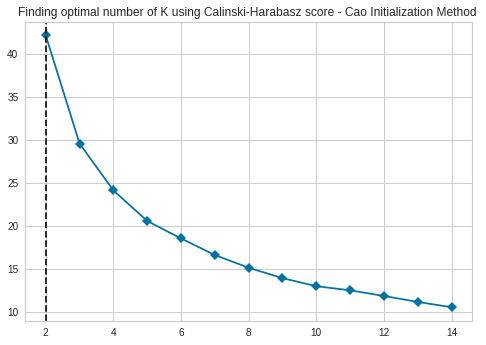

In [22]:
# Calinski Harabasz Score for unsupervised K-prototypes
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KPrototypes(init='Cao')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= False)
visualizer.fit(df_sup_proto,categorical=cat_columns_df_sup_proto)        # Fit the data to the visualizer
plt.title("Finding optimal number of K using Calinski-Harabasz score - Cao Initialization Method ")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('CHindex_optK_supervised_oct25.pdf',format='pdf', dpi=1000, bbox_inches='tight')

In [20]:
#From calinski-harabasz score, optimal number of K is 2
#Run kprototypes with K=2
import random
random.seed(90)
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

kproto_df_sup = KPrototypes(n_clusters= 2, init='Cao', n_jobs = 4)
cluster_df_sup = kproto_df_sup.fit_predict(X_df_sup_proto, categorical = cat_columns_df_sup_proto)

# Print cluster centroids of the trained model.
print(kproto_df_sup.cluster_centroids_)

# Print training statistics
print(kproto_df_sup.cost_)
print(kproto_df_sup.n_iter_)

[[-0.18365038 -0.16431554  0.14409055 -0.4424289  -0.13152867 -0.30354749
  -0.17345117 -0.24565404 -0.3505097  -0.34913444  0.10224651  0.10810753
  -0.263251   -0.36894472 -0.32729275 -0.38301444 -0.44817904 -0.36988851
  -0.29223996 -0.26552842 -0.59021144 -0.23879606 -0.08358082 -0.4372323
  -0.16623068 -0.12010403  0.29565199 -0.22443351 -0.06018997  0.09350653
   0.01263137  0.01763458 -0.27734605  0.38944467  0.10301874 -0.31124482
  -0.02794389  0.1658754   0.25069503 -0.50636494 -0.0956886   0.27243761
   0.51219737 -0.20960886  0.53104901 -0.27090892 -0.31859885 -0.27819762
  -0.28974032 -0.48795876 -0.27429525 -0.26658219 -0.22807497 -0.14574222
  -0.27799666 -0.40857506 -0.16437767 -0.44494247 -0.13709499 -0.21918872
  -0.22817081 -0.32407615 -0.1131654  -0.14508817  0.33598979  0.32359671
  -0.27651084  0.18803537  0.25319059  0.34986969  0.15977989  0.
  -0.11543499  0.15605173 -0.0762742   0.24154734  0.          0.
   0.          0.1567652  -0.01004894  0.37563648 -0.30

In [21]:
#Print count of each cluster
print(pd.Series(cluster_df_sup).value_counts())

1    340
0    270
dtype: int64


In [22]:
#Get kproto_df_scale_cat labels as follow
kproto_df_sup_labs = kproto_df_sup.labels_

In [23]:
#Make a copy of df_sup_proto and set the objects to category 
df_sup_copy = df_sup_proto.copy()
for i in df_sup_copy.select_dtypes(include='object'):
    df_sup_copy[i] = df_sup_copy[i].astype('category')

EVALUATION OF CLUSTERING METHOD BY CLASSIFICATION

In [24]:
#Use of LightGBM as my classifier because it handles categorical variables and because it is relatively fast to obtain shap values for the trained models.
clf_sup_K2 = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_sup_K2 = cross_val_score(clf_sup_K2, df_sup_copy, kproto_df_sup_labs, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_sup_K2)}')
#CV score of 0.849 (close to 1)meaning that the observations are grouped in meaningful and distinguishable clusters.

CV F1 score for K-Prototypes clusters is 0.9226721962495196


In [25]:
clf_sup_K2.fit(df_sup_copy, kproto_df_sup_labs)

LGBMClassifier(colsample_by_tree=0.8)

In [26]:
explainer_sup_K2 = shap.TreeExplainer(clf_sup_K2)
shap_values_sup_K2 = explainer_sup_K2.shap_values(df_sup_copy)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


2. INFORMATIVENESS OF CLUSTERS BY SHAP FEATURES IMPORTANCE

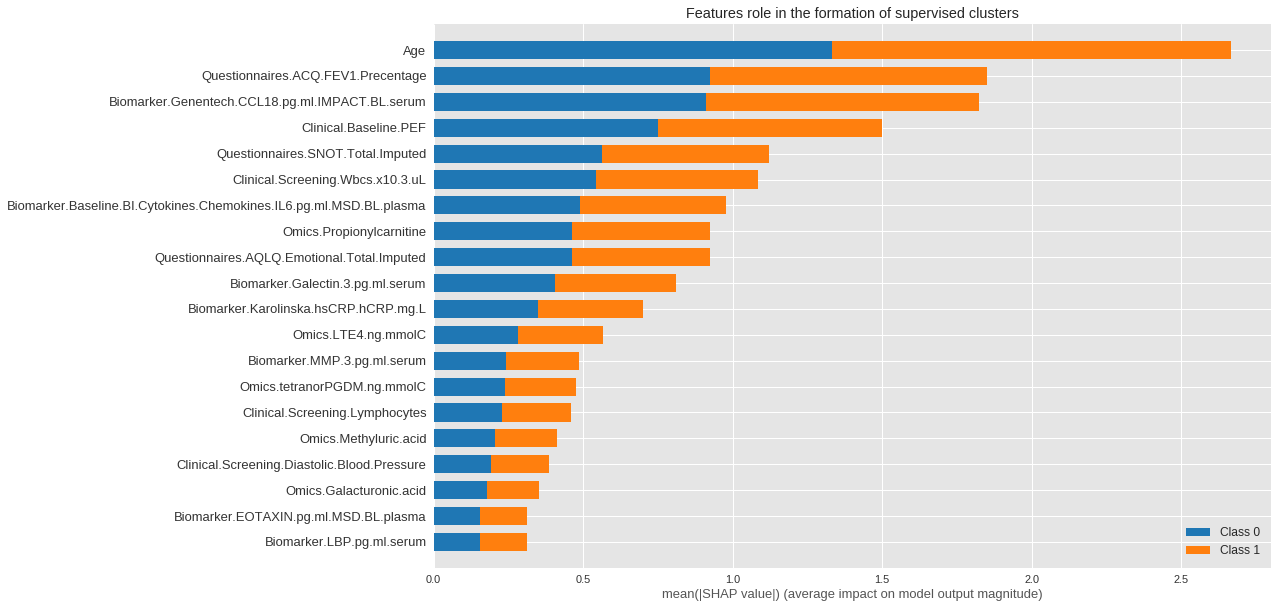

In [27]:
shap.summary_plot(shap_values_sup_K2, df_sup_copy, plot_type="bar", plot_size=(15, 10),color=plt.get_cmap("tab10"),show=False)
ax = plt.gca()
plt.title("Features role in the formation of supervised clusters")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_2_clusters_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 1

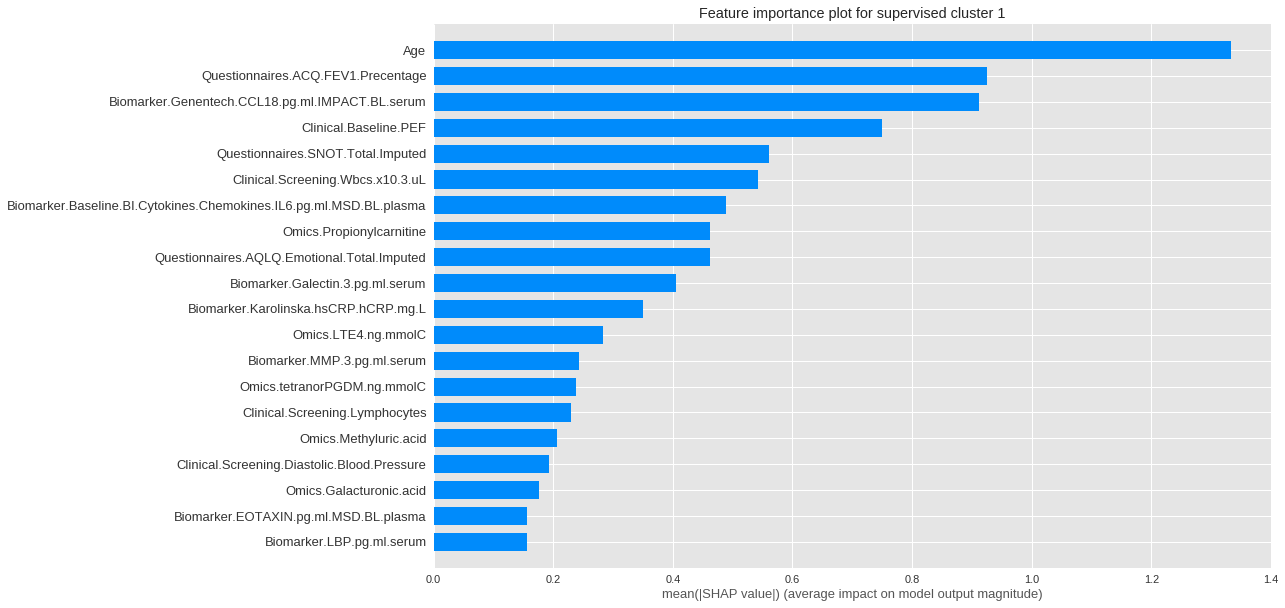

In [28]:
shap.summary_plot(shap_values_sup_K2[0], df_sup_copy, plot_type="bar", plot_size=(15, 10),show=False)
ax = plt.gca()
plt.title("Feature importance plot for supervised cluster 1")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust1_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 2

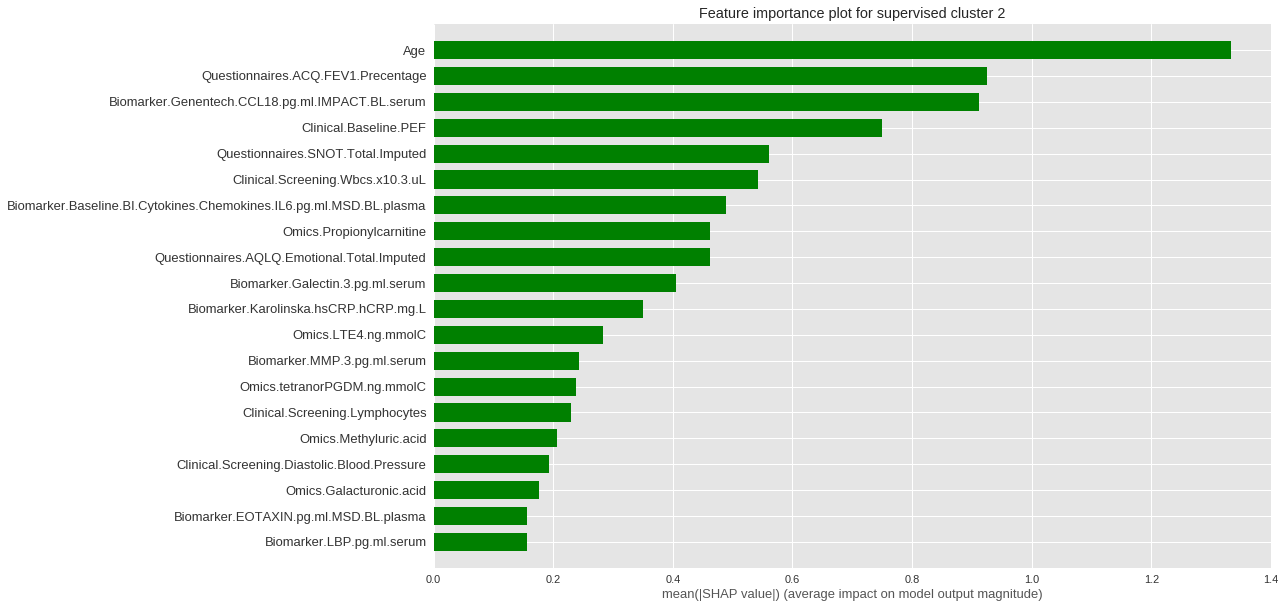

In [29]:
shap.summary_plot(shap_values_sup_K2[1], df_sup_copy, plot_type="bar", plot_size=(15, 10),color = "green",show=False)
ax = plt.gca()
plt.title("Feature importance plot for supervised cluster 2")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust2_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

REDO ANALYSIS WITH K = 3 (BEST ACCORDING TO C-INDEX)

In [30]:
#From multiple score, optimal number of K is 3
#Run kprototypes with K=3
import random
random.seed(92)
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

kproto_df_sup_3 = KPrototypes(n_clusters= 3, init='Cao', n_jobs = 4)
cluster_df_sup_3 = kproto_df_sup_3.fit_predict(X_df_sup_proto, categorical = cat_columns_df_sup_proto)

# Print cluster centroids of the trained model.
print(kproto_df_sup_3.cluster_centroids_)

# Print training statistics
print(kproto_df_sup_3.cost_)
print(kproto_df_sup_3.n_iter_)

[[-1.95390442e-01 -1.99434790e-01  1.63620840e-01 -4.52342645e-01
  -2.20631320e-01 -4.10515867e-01 -2.67348925e-01 -2.23931659e-01
  -5.09828037e-01 -4.99692426e-01  1.40755112e-01  2.16844555e-01
  -3.08601805e-01 -4.95941045e-01 -4.18833572e-01 -5.18537475e-01
  -4.45169101e-01 -5.02189516e-01 -3.40873218e-01 -2.79154188e-01
  -7.72081963e-01 -3.05767030e-01 -9.13826003e-02 -4.49736836e-01
  -2.25051104e-01 -1.73824784e-01  3.39684924e-01 -2.67484038e-01
  -1.80279444e-01  3.81658182e-02 -3.89678679e-02 -1.00595423e-01
  -4.49690209e-01  4.55675348e-01  7.91228365e-02 -2.91861921e-01
  -9.68404757e-02  1.75162587e-01  2.77249812e-01 -5.91051887e-01
  -1.13824230e-01  3.67832289e-01  7.87979241e-01 -2.37871662e-01
   5.45205701e-01 -3.53689645e-01 -3.55262948e-01 -3.04786836e-01
  -4.08871514e-01 -4.89516514e-01 -2.97723974e-01 -2.32203422e-01
  -1.55886724e-01 -9.75020975e-02 -2.70421792e-01 -4.65096575e-01
  -1.62387901e-01 -5.51977032e-01 -2.23053741e-01 -3.19106194e-01
  -3.79999

In [31]:
#Print count of each cluster
print(pd.Series(cluster_df_sup_3).value_counts())

2    224
0    210
1    176
dtype: int64


In [32]:
#Get kproto_df_scale_cat labels as follow
kproto_df_sup_labs_3 = kproto_df_sup_3.labels_

In [33]:
#Make a copy of df_sup_proto and set the objects to category 
df_sup_copy_3 = df_sup_proto.copy()
for i in df_sup_copy_3.select_dtypes(include='object'):
    df_sup_copy_3[i] = df_sup_copy_3[i].astype('category')

EVALUATION OF CLUSTERING METHOD BY CLASSIFICATION FOR K=3

In [34]:
#Use of LightGBM as my classifier because it handles categorical variables and because it is relatively fast to obtain shap values for the trained models.
clf_sup_K3 = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_sup_K3 = cross_val_score(clf_sup_K3, df_sup_copy_3, kproto_df_sup_labs_3, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_sup_K3)}')
#CV score of 0.867 (less close to 1 but still good as we added granularity) meaning that the observations are less grouped in meaningful and distinguishable clusters.

CV F1 score for K-Prototypes clusters is 0.8674038605220697


In [35]:
clf_sup_K3.fit(df_sup_copy_3, kproto_df_sup_labs_3)

LGBMClassifier(colsample_by_tree=0.8)

In [37]:
explainer_sup_K3 = shap.TreeExplainer(clf_sup_K3)
shap_values_sup_K3 = explainer_sup_K3.shap_values(df_sup_copy_3)

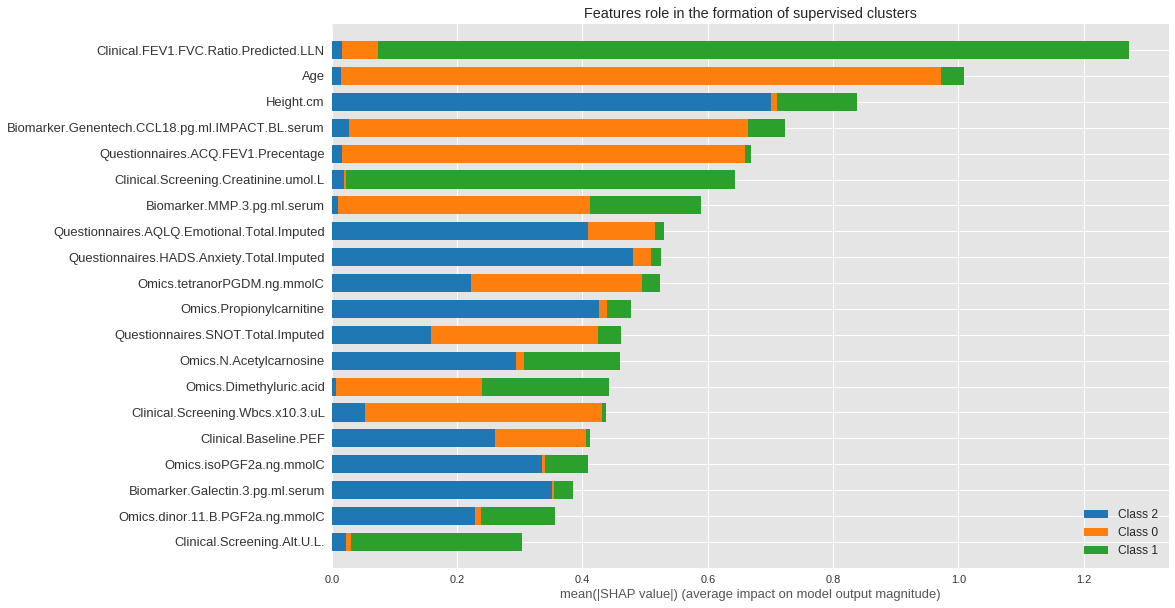

In [38]:
shap.summary_plot(shap_values_sup_K3, df_sup_copy_3, plot_type="bar", plot_size=(15, 10),color=plt.get_cmap("tab10"),show=False)
ax = plt.gca()
plt.title("Features role in the formation of supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_3_clusters_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 1

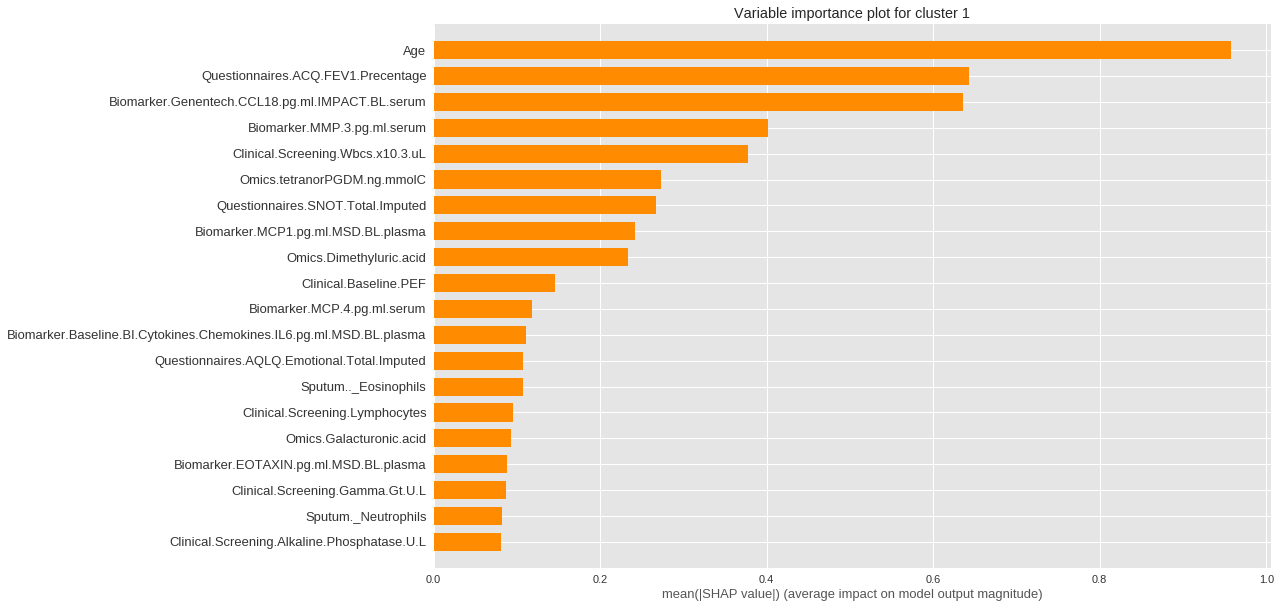

In [40]:
shap.summary_plot(shap_values_sup_K3[0], df_sup_copy_3, plot_type="bar", plot_size=(15, 10),color="darkorange",show=False)
ax = plt.gca()
plt.title("Variable importance plot for cluster 1")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust1_K3sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 2

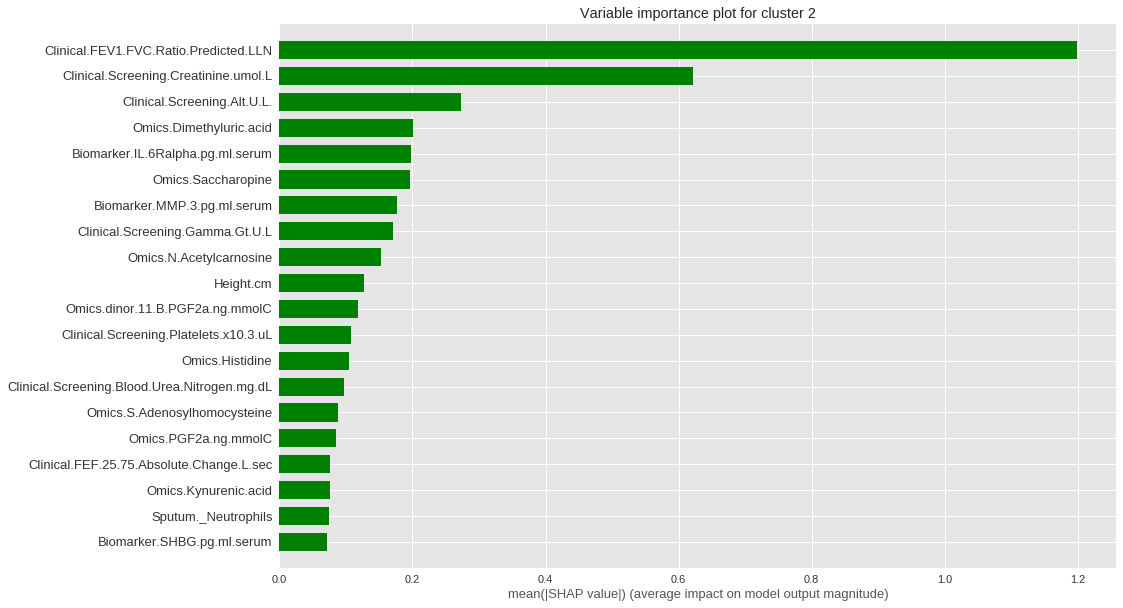

In [43]:
shap.summary_plot(shap_values_sup_K3[1], df_sup_copy_3, plot_type="bar", plot_size=(15, 10),color="green",show=False)
ax = plt.gca()
plt.title("Variable importance plot for cluster 2")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust2_K3sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 3

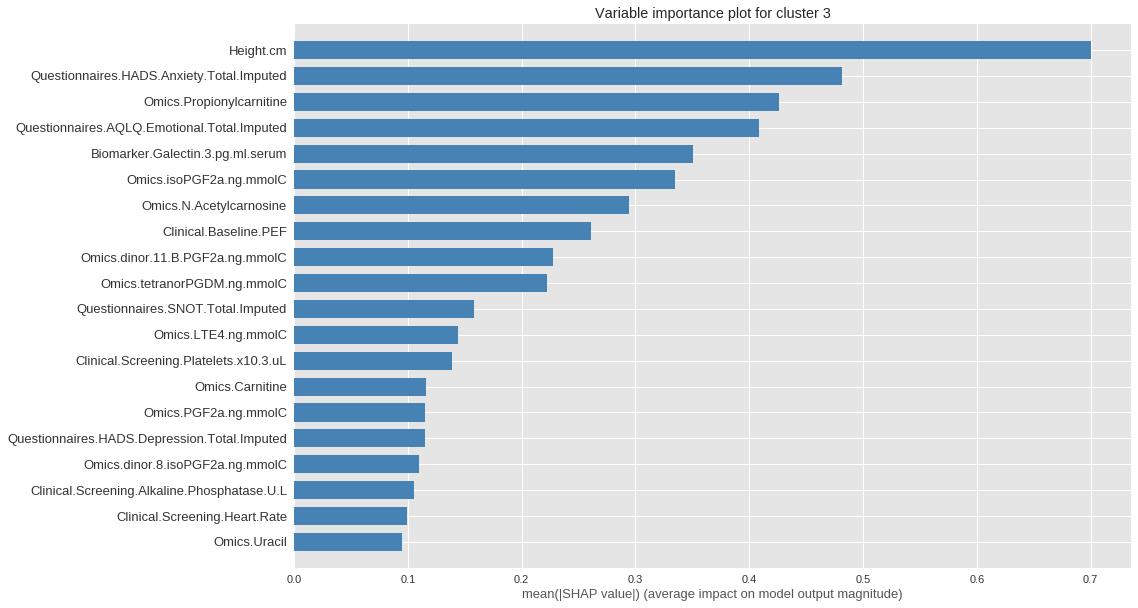

In [45]:
shap.summary_plot(shap_values_sup_K3[2], df_sup_copy_3, plot_type="bar", plot_size=(15, 10),color="steelblue",show=False)
ax = plt.gca()
plt.title("Variable importance plot for cluster 3")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust3_K3sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

REDO ANALYSIS WITH K = 5

In [46]:
#From PCA viz, optimal number of K is 5
#Run kprototypes with K=5
import random
random.seed(94)
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

kproto_df_sup_5 = KPrototypes(n_clusters= 5, init='Cao', n_jobs = 4)
cluster_df_sup_5 = kproto_df_sup_5.fit_predict(X_df_sup_proto, categorical = cat_columns_df_sup_proto)

# Print cluster centroids of the trained model.
print(kproto_df_sup_5.cluster_centroids_)

# Print training statistics
print(kproto_df_sup_5.cost_)
print(kproto_df_sup_5.n_iter_)

[[ 0.00544391  0.38350361 -0.02764257  0.21069012  0.01767849 -0.37189329
  -0.01500603  0.55747103  0.43817654 -0.46053983  0.00266456 -0.06368262
   0.29476959 -0.06415395  0.52235784  0.15152702  0.39187181  0.31833982
   0.46086738  0.30226645  0.38404973  0.88853895  0.57493183  0.53916241
   0.3760817   0.11503129 -0.26967556  0.42917412  0.09658522 -0.04169561
  -0.24894312 -0.4981933   0.0769021  -0.06320005 -0.08157126  0.3874015
   0.13327314 -0.09599291  0.03825168  0.0824331   0.08740507 -0.01227672
  -0.0432121   0.24674353 -0.48156404 -0.01698049  0.22497292  0.24393248
  -0.11928957  0.20417508  0.3905794   0.62438472  0.45054588  0.52611377
   0.48385732  0.71149353  0.39161511  0.61298246  0.14647272 -0.49998007
  -0.57534139 -0.58321427 -0.67369212 -0.35673835  0.07790562  0.1229167
  -0.04880982  0.03379586  0.10684143 -0.05424345  0.00945389  0.
  -0.16111017 -0.27009555  0.18378016 -0.35633729  0.          0.
   0.          0.17628853 -0.0055823   0.02578293 -0.154

In [47]:
#Print count of each cluster
print(pd.Series(cluster_df_sup_5).value_counts())

4    142
1    140
2    117
3    107
0    104
dtype: int64


In [48]:
#Get kproto_df_scale_cat labels as follow
kproto_df_sup_labs_5 = kproto_df_sup_5.labels_

In [49]:
#Make a copy of df_sup_proto and set the objects to category 
df_sup_copy_5 = df_sup_proto.copy()
for i in df_sup_copy_5.select_dtypes(include='object'):
    df_sup_copy_5[i] = df_sup_copy_5[i].astype('category')

EVALUATION OF CLUSTERING METHOD BY CLASSIFICATION FOR K=5

In [50]:
#Use of LightGBM as my classifier because it handles categorical variables and because it is relatively fast to obtain shap values for the trained models.
clf_sup_K5 = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_sup_K5 = cross_val_score(clf_sup_K5, df_sup_copy_5, kproto_df_sup_labs_5, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_sup_K5)}')
#CV score of 0.77 (less close to 1) meaning that the observations are less grouped in meaningful and distinguishable clusters.

CV F1 score for K-Prototypes clusters is 0.77009085413226


In [51]:
clf_sup_K5.fit(df_sup_copy_5, kproto_df_sup_labs_5)

LGBMClassifier(colsample_by_tree=0.8)

In [52]:
explainer_sup_K5 = shap.TreeExplainer(clf_sup_K5)
shap_values_sup_K5 = explainer_sup_K5.shap_values(df_sup_copy_5)

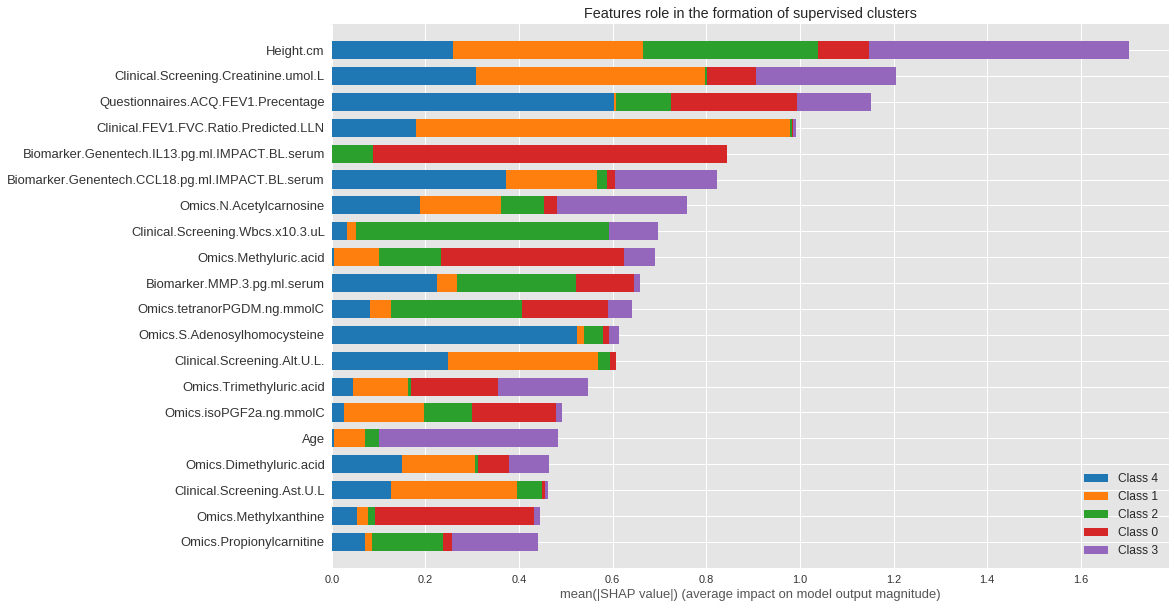

In [53]:
shap.summary_plot(shap_values_sup_K5, df_sup_copy_5, plot_type="bar", plot_size=(15, 10),color=plt.get_cmap("tab10"),show=False)
ax = plt.gca()
plt.title("Features role in the formation of supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_5_clusters_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 1

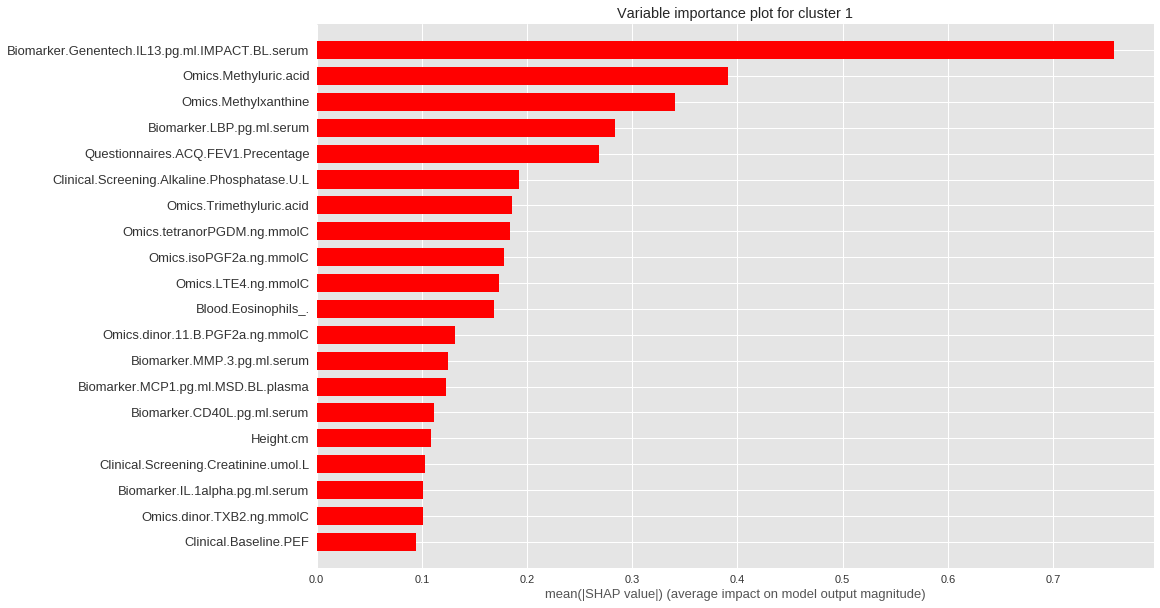

In [54]:
shap.summary_plot(shap_values_sup_K5[0], df_sup_copy_5, plot_type="bar", plot_size=(15, 10),color="red",show=False)
ax = plt.gca()
plt.title("Variable importance plot for cluster 1")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust1_K5sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 2

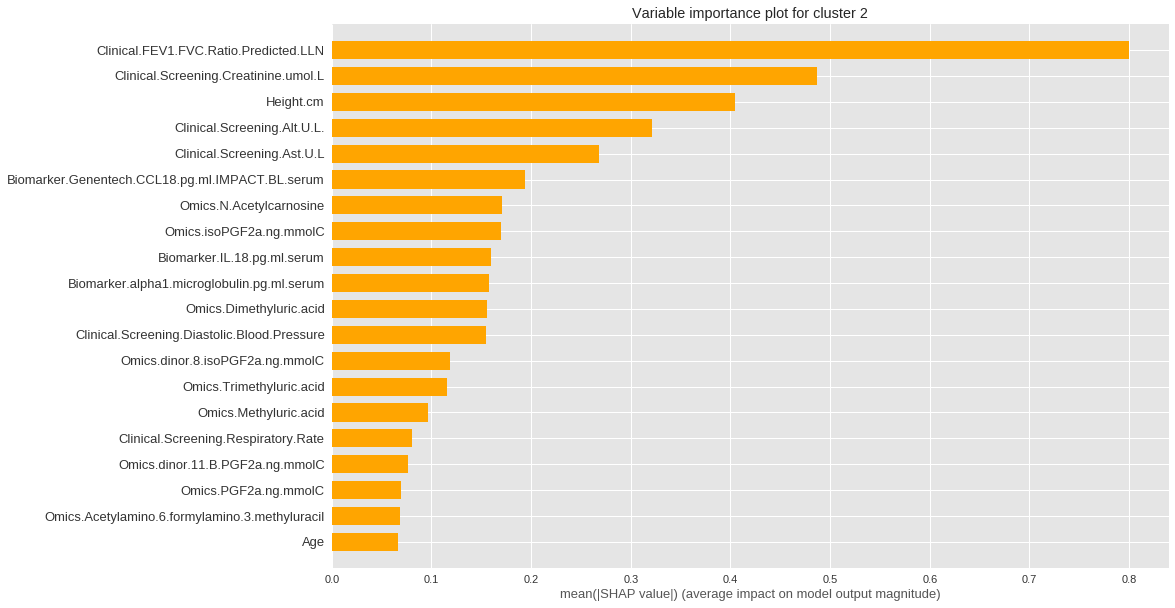

In [55]:
shap.summary_plot(shap_values_sup_K5[1], df_sup_copy_5, plot_type="bar", plot_size=(15, 10),color="orange",show=False)
ax = plt.gca()
plt.title("Variable importance plot for cluster 2")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust2_K5sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 3

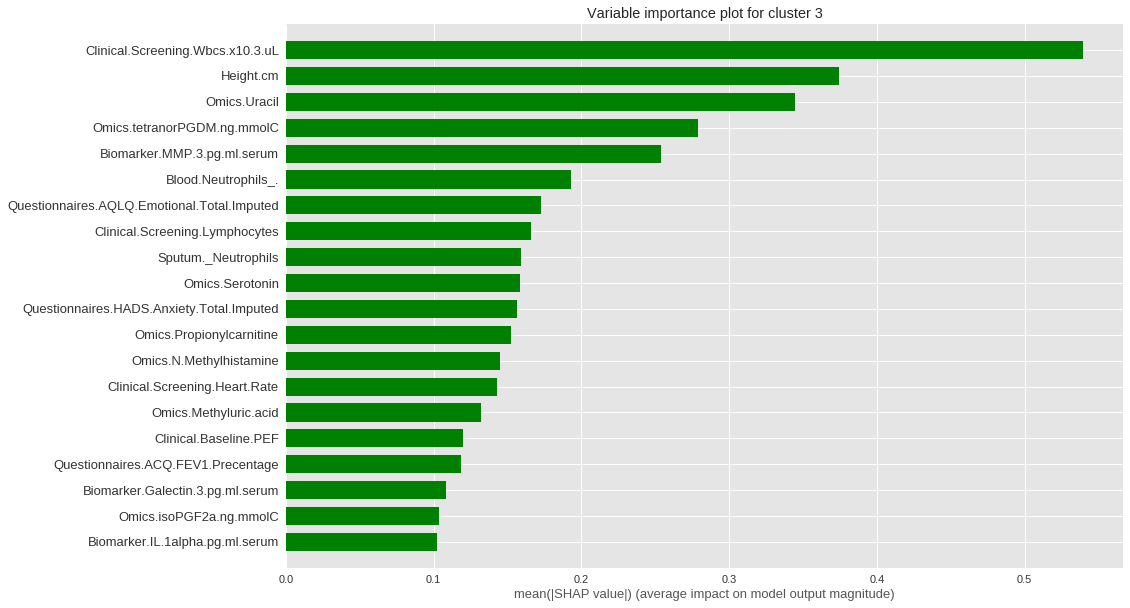

In [57]:
shap.summary_plot(shap_values_sup_K5[2], df_sup_copy_5, plot_type="bar", plot_size=(15, 10),color="green",show=False)
ax = plt.gca()
plt.title("Variable importance plot for cluster 3")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust3_K5sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 4

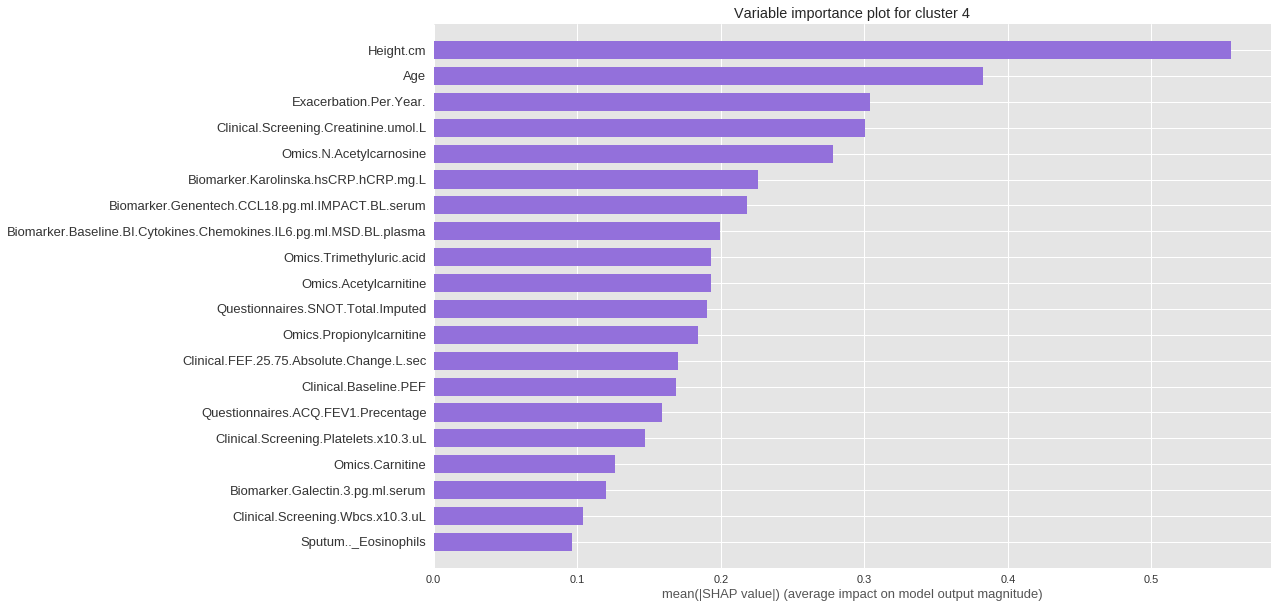

In [58]:
shap.summary_plot(shap_values_sup_K5[3], df_sup_copy_5, plot_type="bar", plot_size=(15, 10),color="mediumpurple",show=False)
ax = plt.gca()
plt.title("Variable importance plot for cluster 4")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust4_K5sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 5

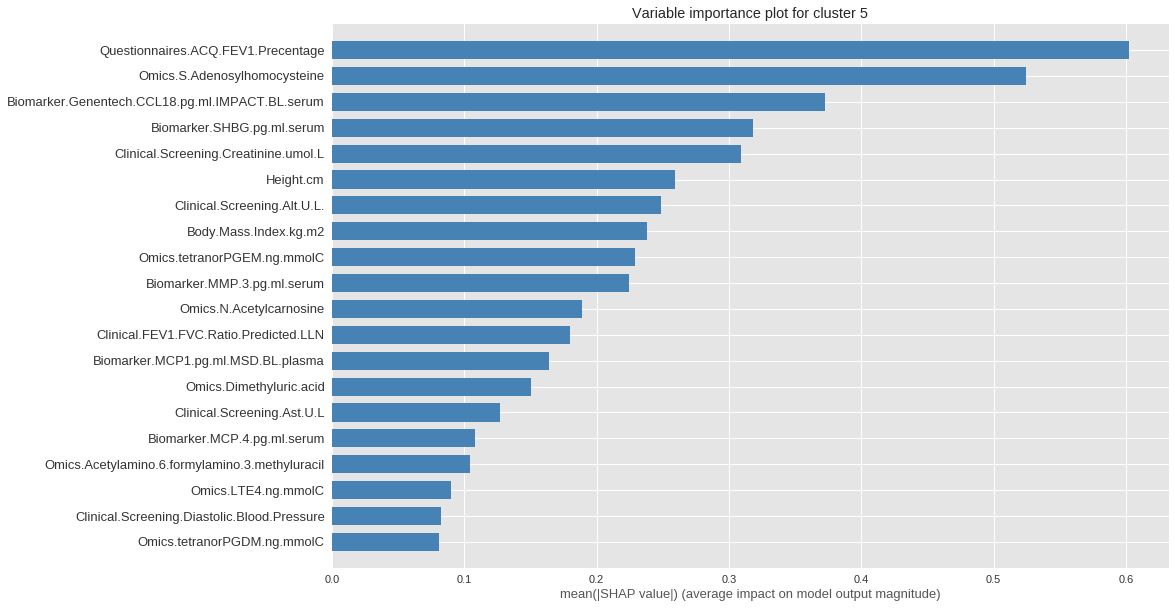

In [59]:
shap.summary_plot(shap_values_sup_K5[4], df_sup_copy_5, plot_type="bar", plot_size=(15, 10),color="steelblue",show=False)
ax = plt.gca()
plt.title("Variable importance plot for cluster 5")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust5_K5sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

CROSSTABS - CLUSTER - OUTCOME

Relationship between Ks (Sup Clustering) and outcome (asthma severity)

In [75]:
combo_2 = pd.crosstab(df_sup['cluster_K_2'], df_sup['cohort'])
combo_3 = pd.crosstab(df_sup['cluster_K_3'], df_sup['cohort'])
combo_4 = pd.crosstab(df_sup['cluster_K_4'], df_sup['cohort'])
combo_5 = pd.crosstab(df_sup['cluster_K_5'], df_sup['cohort'])
combo_6 = pd.crosstab(df_sup['cluster_K_6'], df_sup['cohort'])
combo_7 = pd.crosstab(df_sup['cluster_K_7'], df_sup['cohort'])
combo_8 = pd.crosstab(df_sup['cluster_K_8'], df_sup['cohort'])
combo_9 = pd.crosstab(df_sup['cluster_K_9'], df_sup['cohort'])
combo_10 = pd.crosstab(df_sup['cluster_K_10'], df_sup['cohort'])
combo_11 = pd.crosstab(df_sup['cluster_K_11'], df_sup['cohort'])
combo_12 = pd.crosstab(df_sup['cluster_K_12'], df_sup['cohort'])
combo_13 = pd.crosstab(df_sup['cluster_K_13'], df_sup['cohort'])
combo_14 = pd.crosstab(df_sup['cluster_K_14'], df_sup['cohort'])
combo_15 = pd.crosstab(df_sup['cluster_K_15'], df_sup['cohort'])

K_2_Healthy = pd.crosstab(df_sup['cluster_K_2'], df_sup['Healthy'])
K_2_MildModerate = pd.crosstab(df_sup['cluster_K_2'], df_sup['MildModerate'])
K_2_Severe = pd.crosstab(df_sup['cluster_K_2'], df_sup['Severe'])
K_2_Severe_Smoker = pd.crosstab(df_sup['cluster_K_2'], df_sup['Severe_Smoker'])
K_2_Severe_asthma = pd.crosstab(df_sup['cluster_K_2'], df_sup['Severe_asthma'])

K_3_Healthy = pd.crosstab(df_sup['cluster_K_3'], df_sup['Healthy'])
K_3_MildModerate = pd.crosstab(df_sup['cluster_K_3'], df_sup['MildModerate'])
K_3_Severe = pd.crosstab(df_sup['cluster_K_3'], df_sup['Severe'])
K_3_Severe_Smoker = pd.crosstab(df_sup['cluster_K_3'], df_sup['Severe_Smoker'])
K_3_Severe_asthma = pd.crosstab(df_sup['cluster_K_3'], df_sup['Severe_asthma'])

K_5_Healthy = pd.crosstab(df_sup['cluster_K_5'], df_sup['Healthy'])
K_5_MildModerate = pd.crosstab(df_sup['cluster_K_5'], df_sup['MildModerate'])
K_5_Severe = pd.crosstab(df_sup['cluster_K_5'], df_sup['Severe'])
K_5_Severe_Smoker = pd.crosstab(df_sup['cluster_K_5'], df_sup['Severe_Smoker'])
K_5_Severe_asthma = pd.crosstab(df_sup['cluster_K_5'], df_sup['Severe_asthma'])

In [89]:
#Get percentages

K_2_Healthy_percentage = K_2_Healthy.div(K_2_Healthy.sum(axis=1),axis=0)*100
K_2_MildModerate_percentage = K_2_MildModerate.div(K_2_MildModerate.sum(axis=1),axis=0)*100
K_2_Severe_percentage = K_2_Severe.div(K_2_Severe.sum(axis=1),axis=0)*100
K_2_Severe_Smoker_percentage = K_2_Severe_Smoker.div(K_2_Severe_Smoker.sum(axis=1),axis=0)*100
K_2_Severe_asthma_percentage = K_2_Severe_asthma.div(K_2_Severe_asthma.sum(axis=1),axis=0)*100

K_3_Healthy_percentage = K_3_Healthy.div(K_3_Healthy.sum(axis=1),axis=0)*100
K_3_MildModerate_percentage = K_3_MildModerate.div(K_3_MildModerate.sum(axis=1),axis=0)*100
K_3_Severe_percentage = K_3_Severe.div(K_3_Severe.sum(axis=1),axis=0)*100
K_3_Severe_Smoker_percentage = K_3_Severe_Smoker.div(K_3_Severe_Smoker.sum(axis=1),axis=0)*100
K_3_Severe_asthma_percentage = K_3_Severe_asthma.div(K_3_Severe_asthma.sum(axis=1),axis=0)*100

K_5_Healthy_percentage = K_5_Healthy.div(K_5_Healthy.sum(axis=1),axis=0)*100
K_5_MildModerate_percentage = K_5_MildModerate.div(K_5_MildModerate.sum(axis=1),axis=0)*100
K_5_Severe_percentage = K_5_Severe.div(K_5_Severe.sum(axis=1),axis=0)*100
K_5_Severe_Smoker_percentage = K_5_Severe_Smoker.div(K_5_Severe_Smoker.sum(axis=1),axis=0)*100
K_5_Severe_asthma_percentage = K_5_Severe_asthma.div(K_5_Severe_asthma.sum(axis=1),axis=0)*100

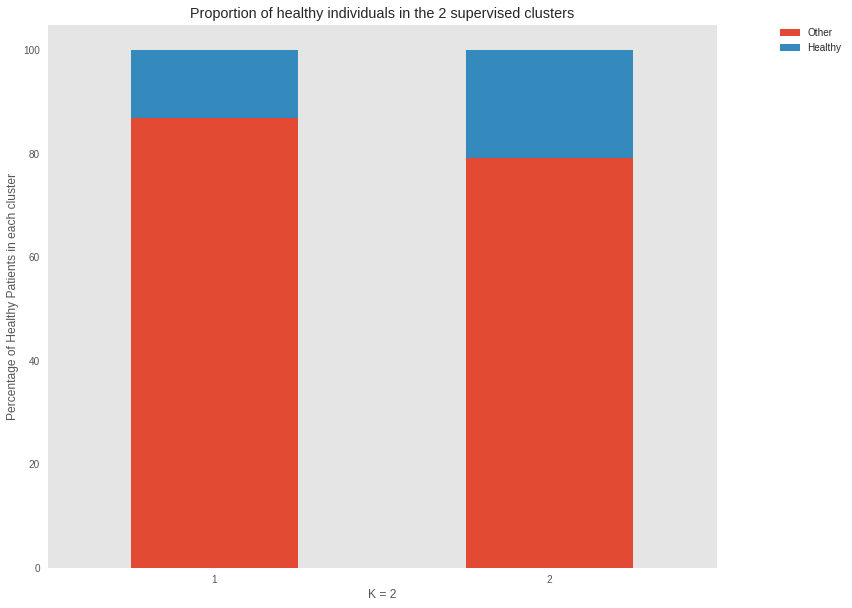

In [88]:
K_2_Healthy_percentage.plot(kind='bar', figsize = (12,10),  stacked=True,)
plt.grid(b=None)
plt.xlabel('K = 2')
plt.ylabel('Percentage of Healthy Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of healthy individuals in the 2 supervised clusters")
plt.legend(["Other", "Healthy"],bbox_to_anchor=(1.2,1.01))
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_2_Healthy_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

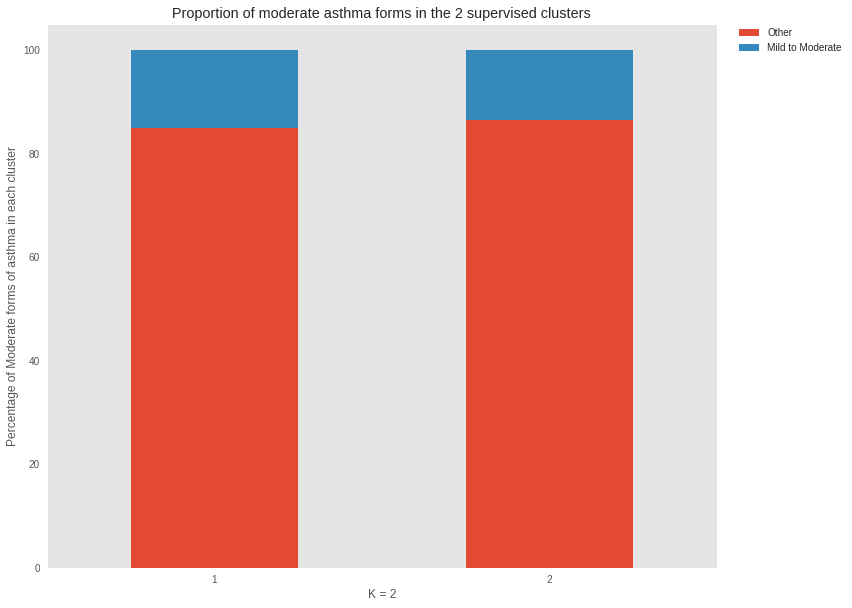

In [90]:
K_2_MildModerate_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Mild to Moderate"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 2')
plt.ylabel('Percentage of Moderate forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of moderate asthma forms in the 2 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_2_MildModerate_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

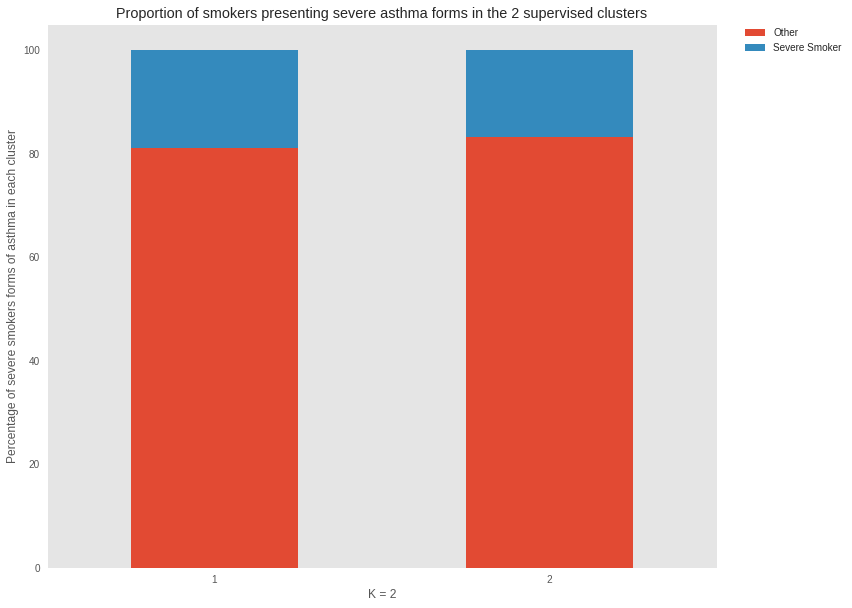

In [91]:
K_2_Severe_Smoker_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Severe Smoker"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 2')
plt.ylabel('Percentage of severe smokers forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of smokers presenting severe asthma forms in the 2 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_2_Severe_Smoker_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

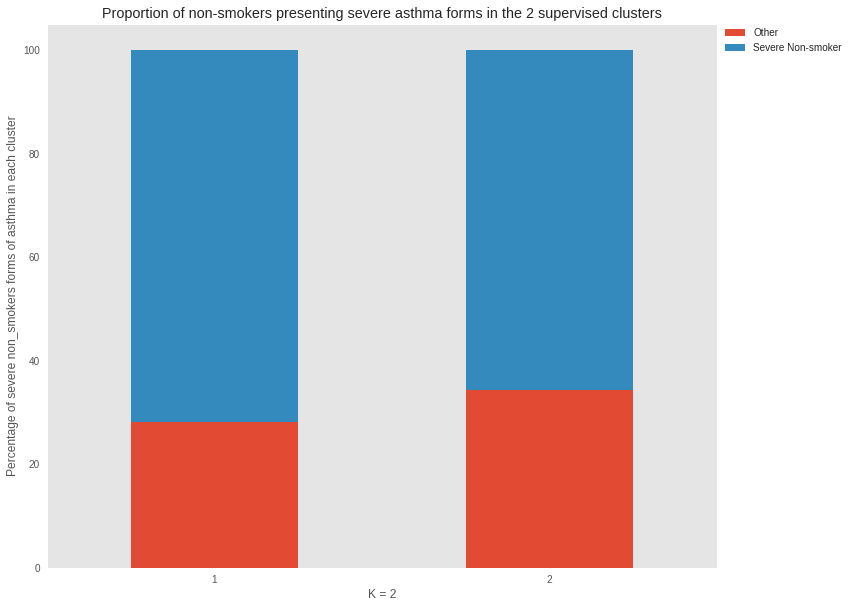

In [92]:
K_2_Severe_asthma_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Severe Non-smoker"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 2')
plt.ylabel('Percentage of severe non_smokers forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of non-smokers presenting severe asthma forms in the 2 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_2_Severe_asthma_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

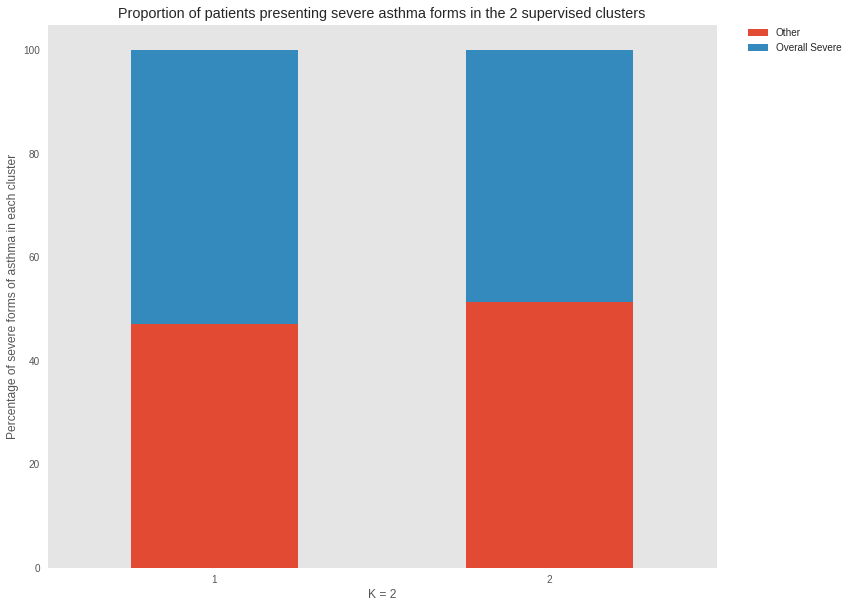

In [93]:
K_2_Severe_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Overall Severe"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 2')
plt.ylabel('Percentage of severe forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of patients presenting severe asthma forms in the 2 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_2_Severe_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

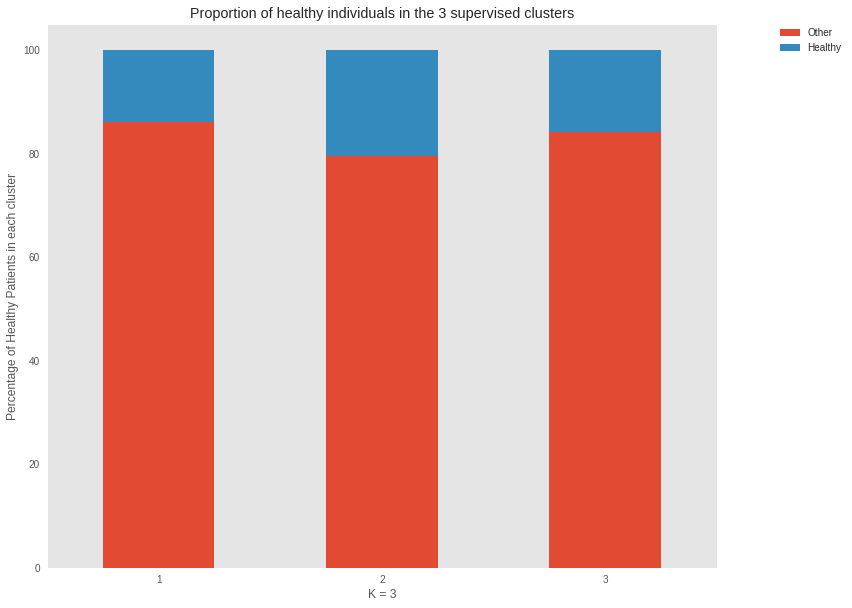

In [94]:
K_3_Healthy_percentage.plot(kind='bar', figsize = (12,10),  stacked=True,)
plt.grid(b=None)
plt.xlabel('K = 3')
plt.ylabel('Percentage of Healthy Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of healthy individuals in the 3 supervised clusters")
plt.legend(["Other", "Healthy"],bbox_to_anchor=(1.2,1.01))
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_3_Healthy_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

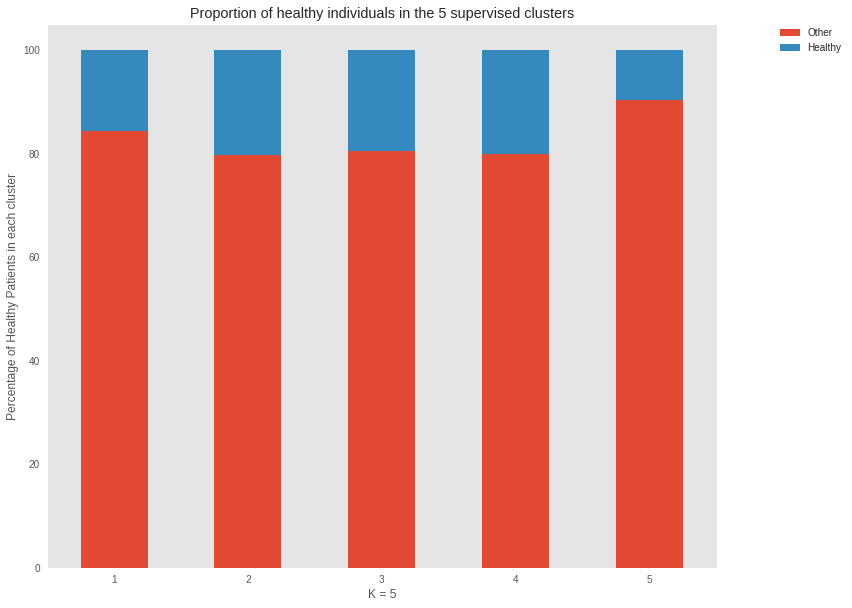

In [95]:
K_5_Healthy_percentage.plot(kind='bar', figsize = (12,10),  stacked=True,)
plt.grid(b=None)
plt.xlabel('K = 5')
plt.ylabel('Percentage of Healthy Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of healthy individuals in the 5 supervised clusters")
plt.legend(["Other", "Healthy"],bbox_to_anchor=(1.2,1.01))
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_5_Healthy_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

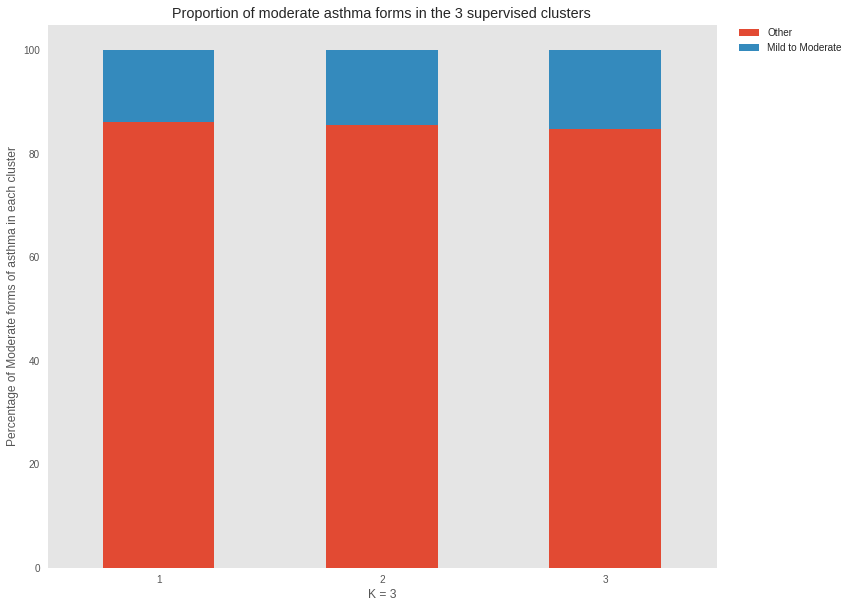

In [96]:
K_3_MildModerate_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Mild to Moderate"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 3')
plt.ylabel('Percentage of Moderate forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of moderate asthma forms in the 3 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_3_MildModerate_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

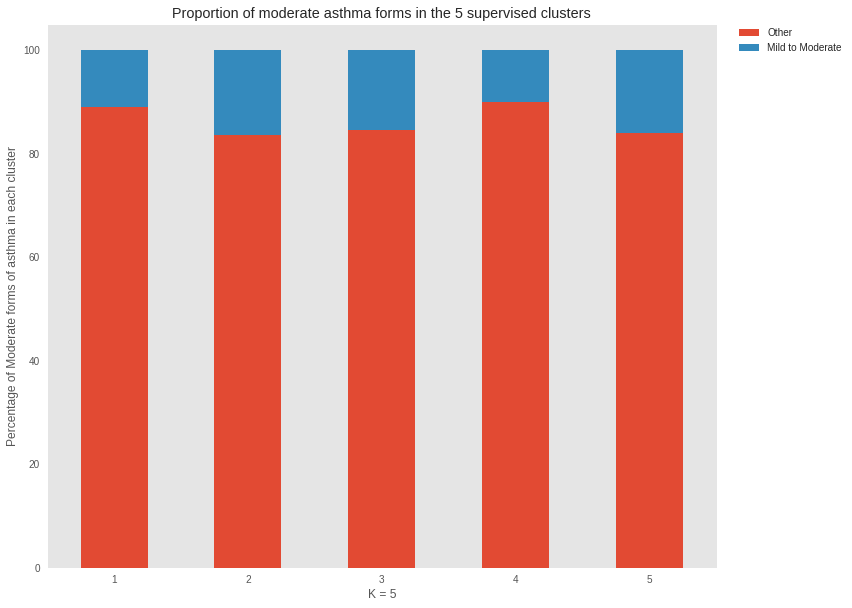

In [97]:
K_5_MildModerate_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Mild to Moderate"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 5')
plt.ylabel('Percentage of Moderate forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of moderate asthma forms in the 5 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_5_MildModerate_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

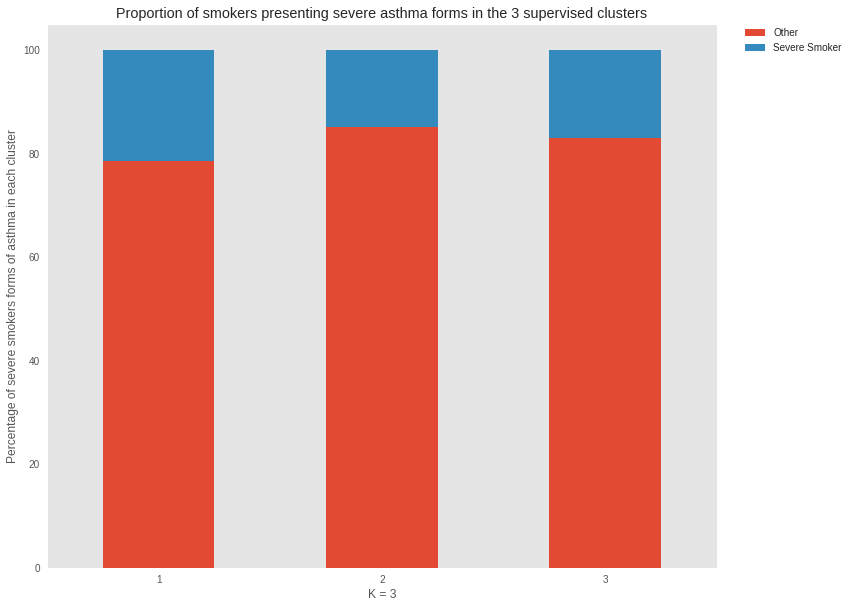

In [98]:
K_3_Severe_Smoker_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Severe Smoker"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 3')
plt.ylabel('Percentage of severe smokers forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of smokers presenting severe asthma forms in the 3 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_3_Severe_Smoker_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

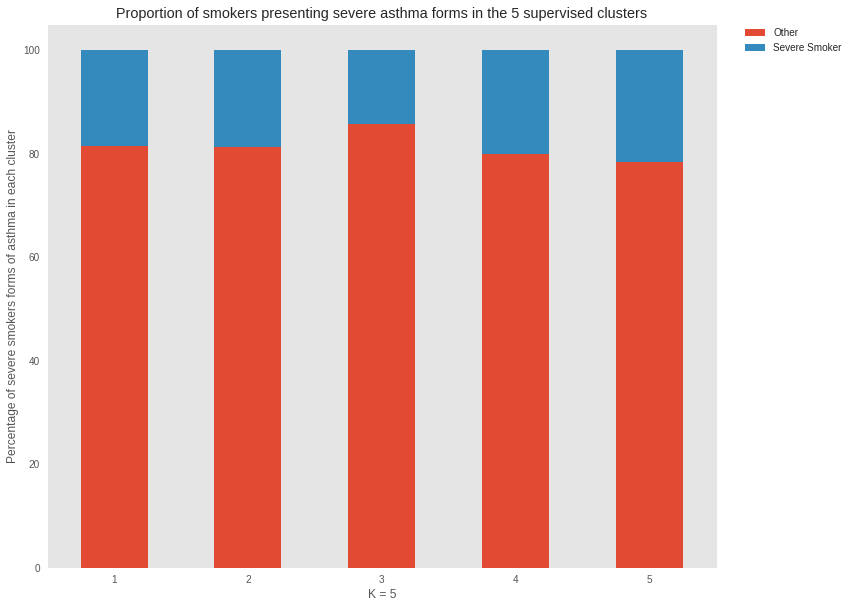

In [99]:
K_5_Severe_Smoker_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Severe Smoker"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 5')
plt.ylabel('Percentage of severe smokers forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of smokers presenting severe asthma forms in the 5 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_5_Severe_Smoker_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

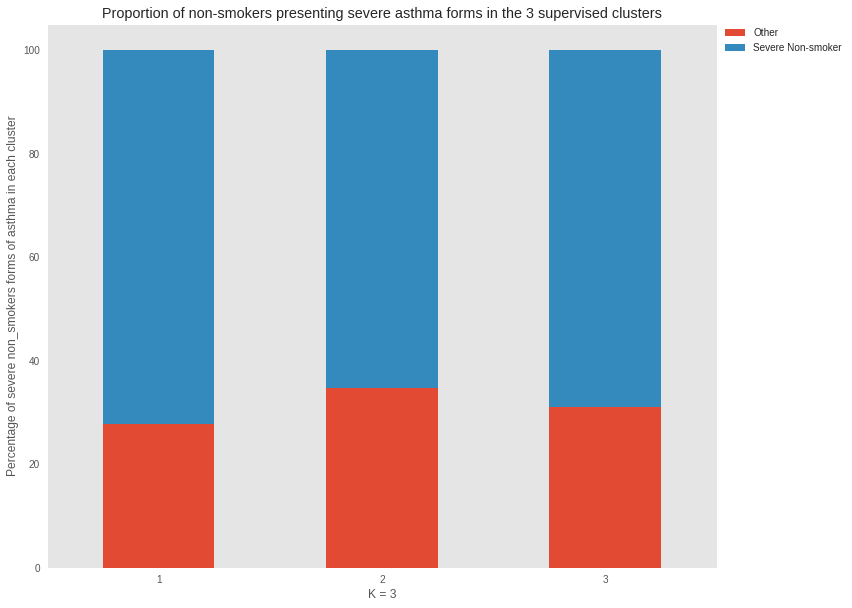

In [100]:
K_3_Severe_asthma_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Severe Non-smoker"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 3')
plt.ylabel('Percentage of severe non_smokers forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of non-smokers presenting severe asthma forms in the 3 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_3_Severe_asthma_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

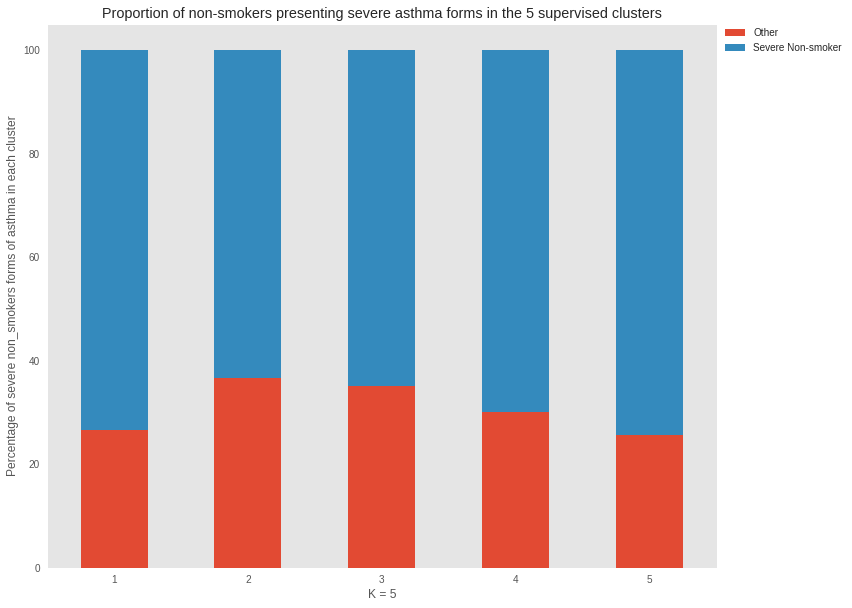

In [101]:
K_5_Severe_asthma_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Severe Non-smoker"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 5')
plt.ylabel('Percentage of severe non_smokers forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of non-smokers presenting severe asthma forms in the 5 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_5_Severe_asthma_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

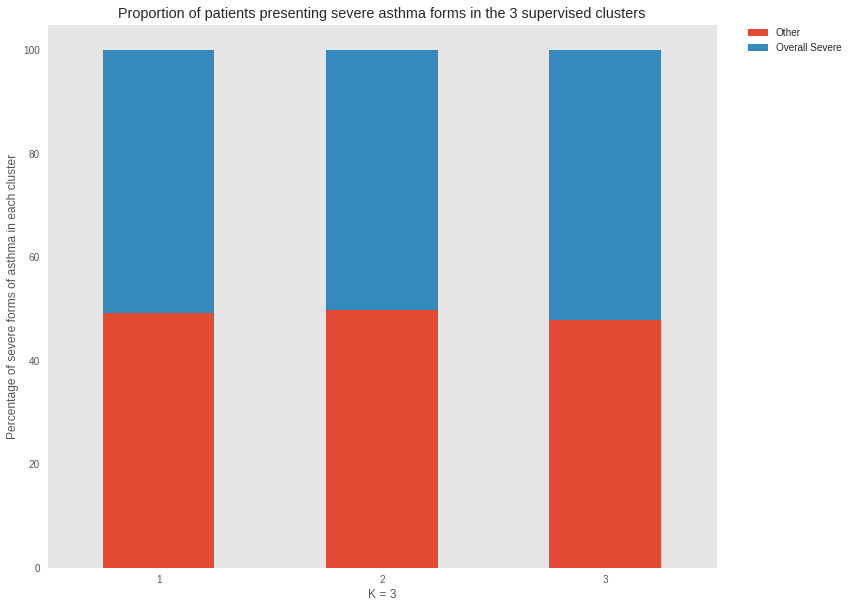

In [102]:
K_3_Severe_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Overall Severe"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 3')
plt.ylabel('Percentage of severe forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of patients presenting severe asthma forms in the 3 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_3_Severe_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

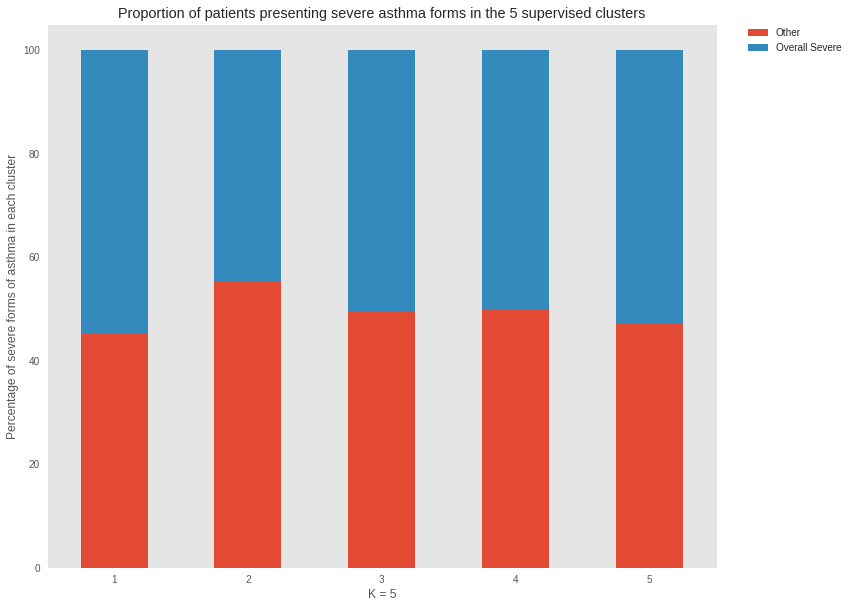

In [103]:
K_5_Severe_percentage.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(["Other", "Overall Severe"],bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 5')
plt.ylabel('Percentage of severe forms of asthma in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Proportion of patients presenting severe asthma forms in the 5 supervised clusters")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K_5_Severe_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

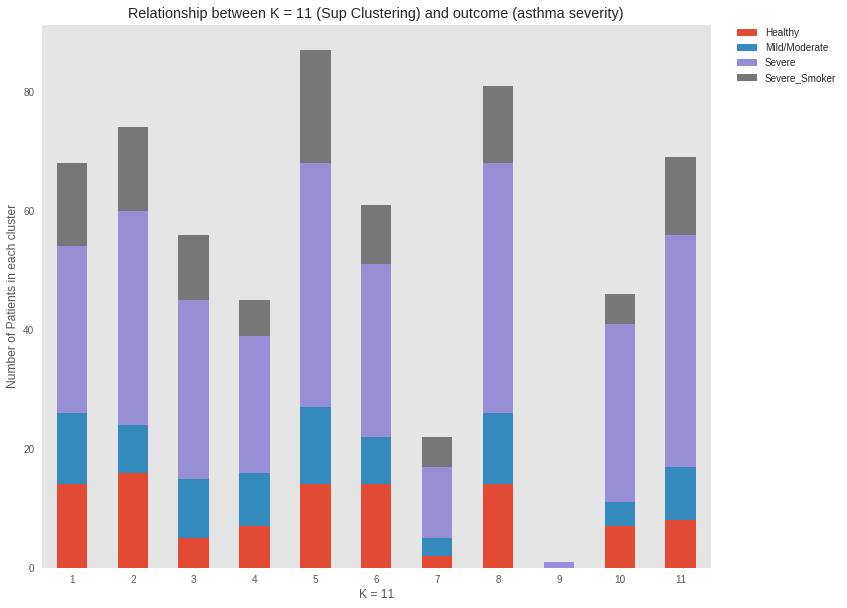

In [61]:
combo_11.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_11.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 11')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 11 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K11sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

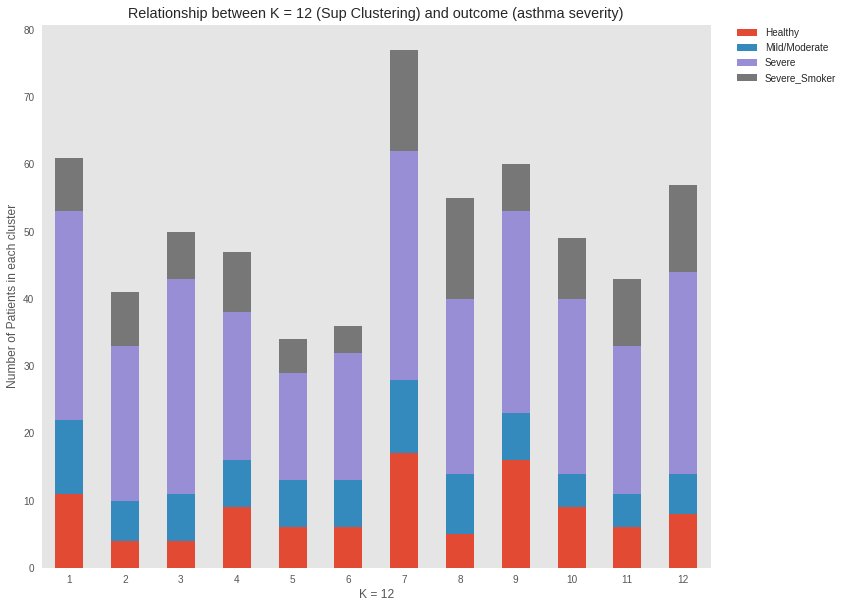

In [62]:
combo_12.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_12.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 12')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 12 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K12sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

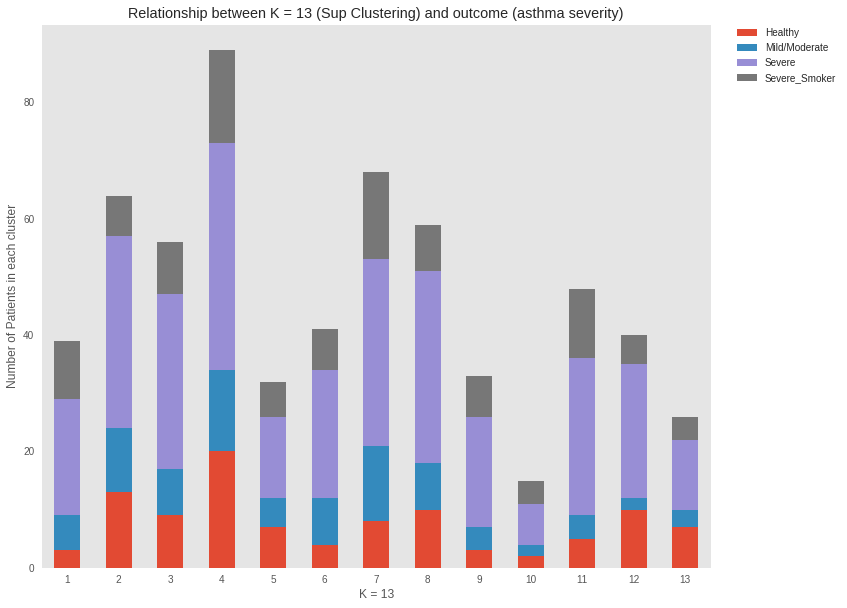

In [63]:
combo_13.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_13.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 13')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 13 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K13sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

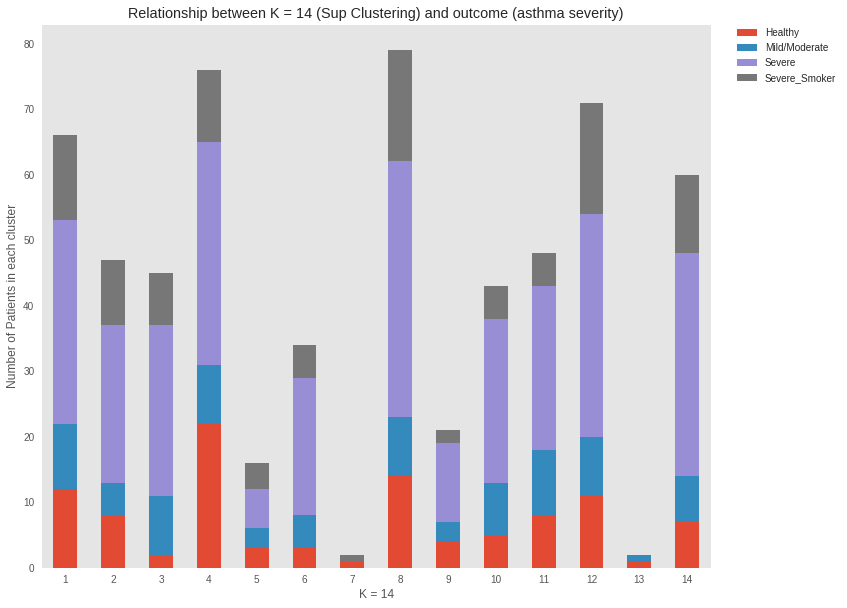

In [64]:
combo_14.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_14.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 14')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 14 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K14sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

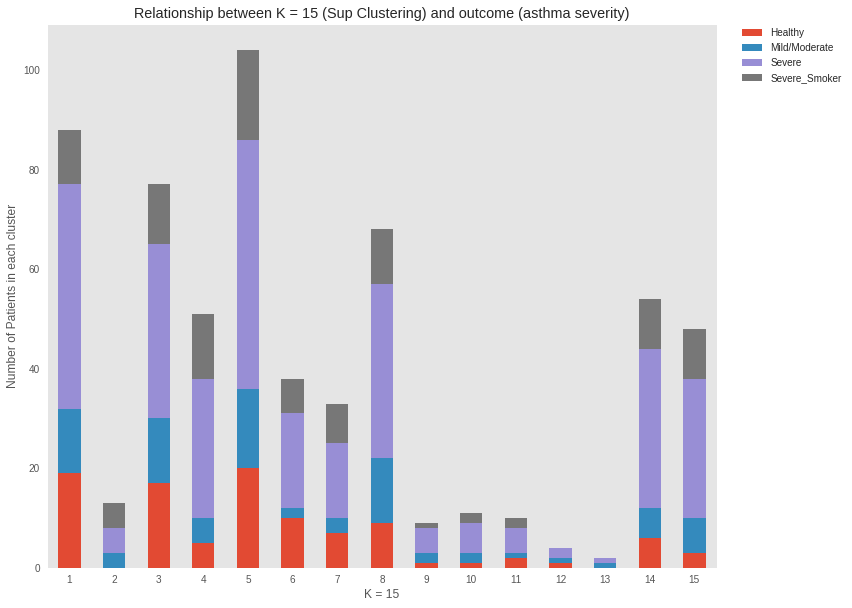

In [65]:
combo_15.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_15.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 15')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 15 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K15sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

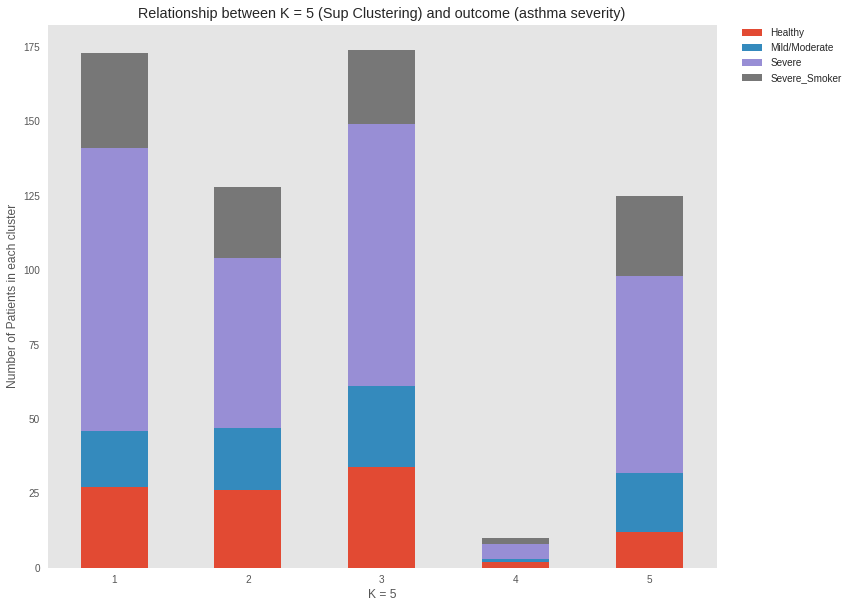

In [66]:
combo_5.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_5.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 5')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 5 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K5sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

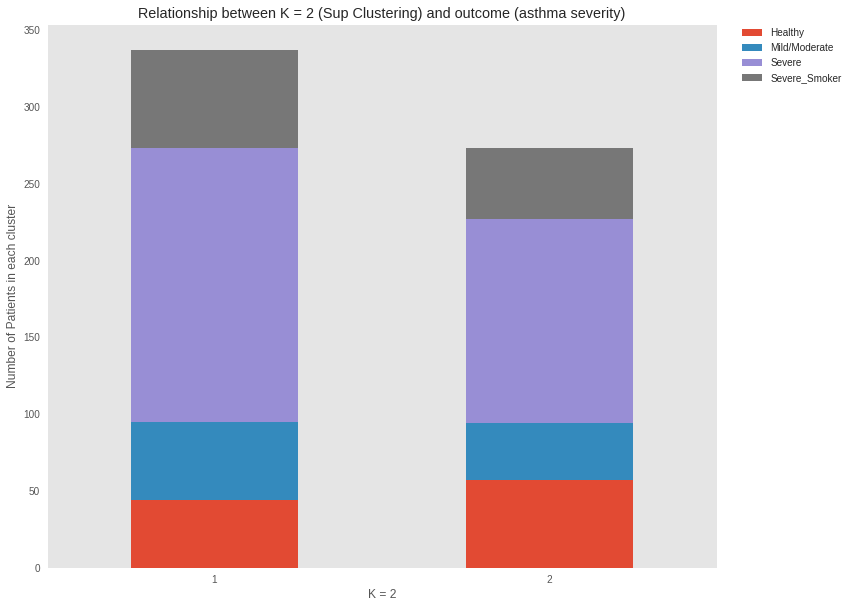

In [67]:
combo_2.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_2.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 2')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 2 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K2sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

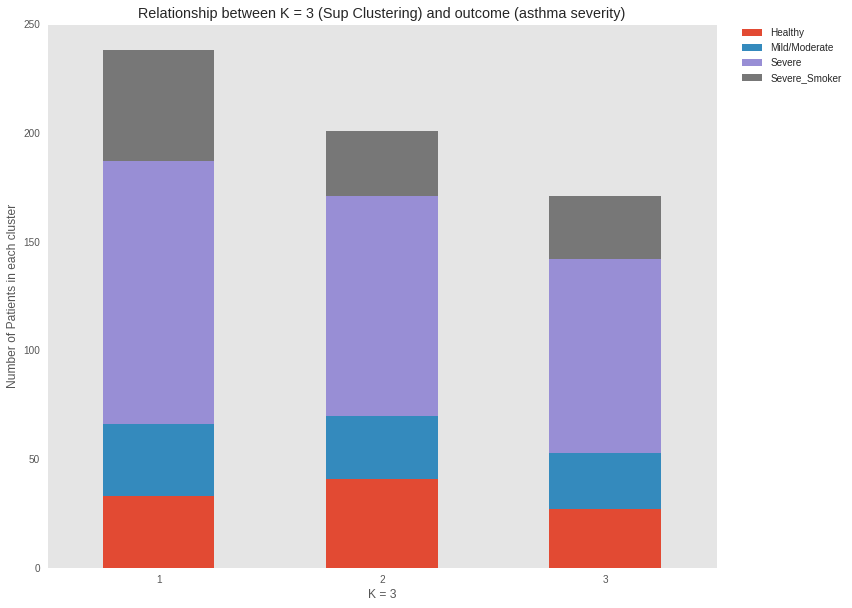

In [68]:
combo_3.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_3.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 3')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 3 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K3sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

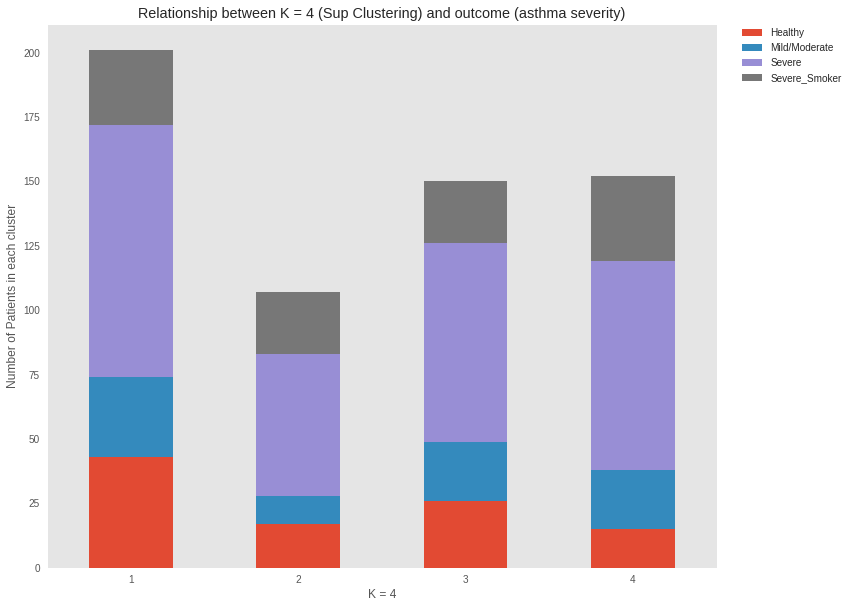

In [69]:
combo_4.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_4.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 4')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 4 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K4sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

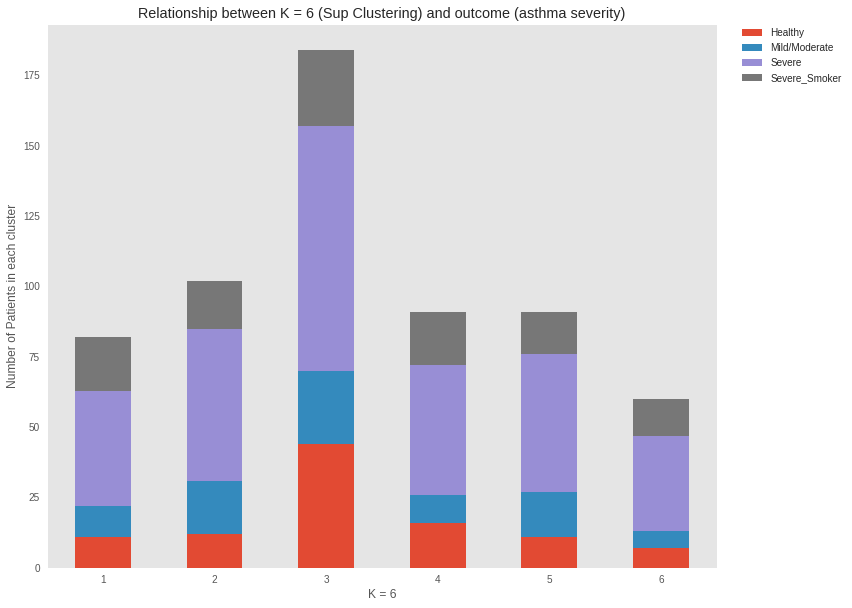

In [70]:
combo_6.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_6.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 6')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 6 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K6sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

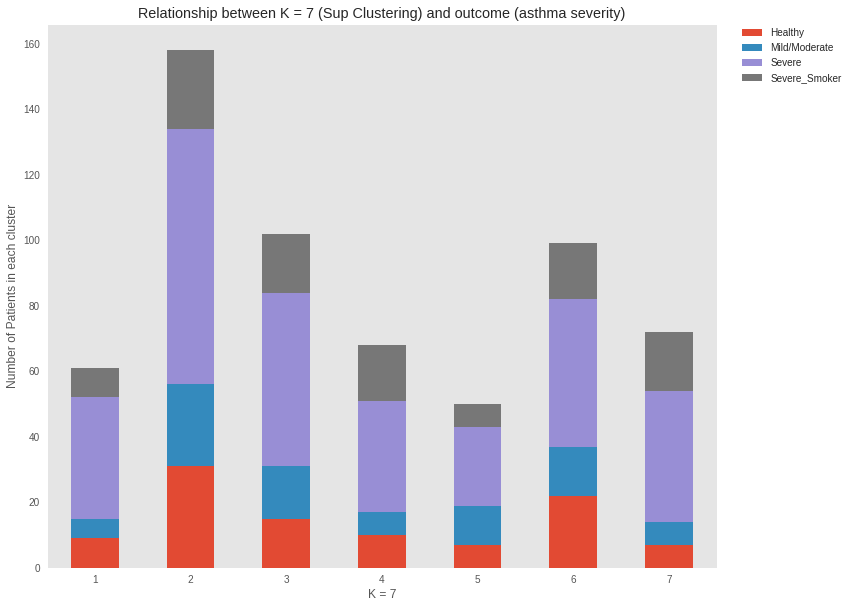

In [71]:
combo_7.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_7.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 7')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 7 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K7sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

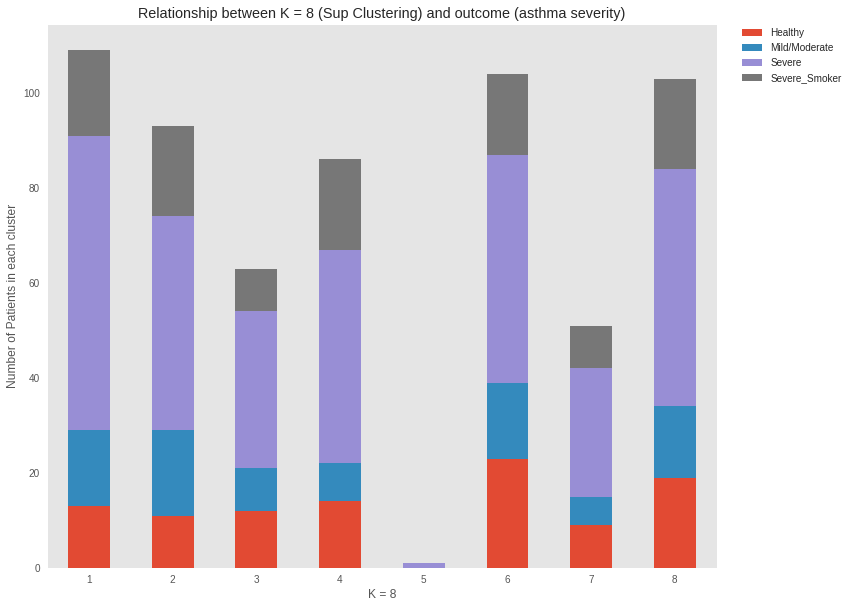

In [72]:
combo_8.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_8.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 8')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 8 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K8sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

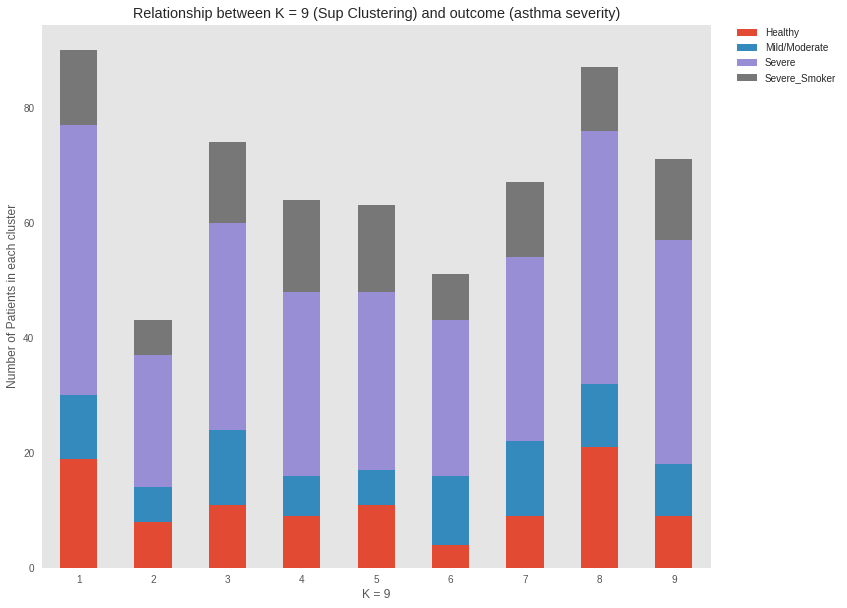

In [73]:
combo_9.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_9.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 9')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 9 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K9sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

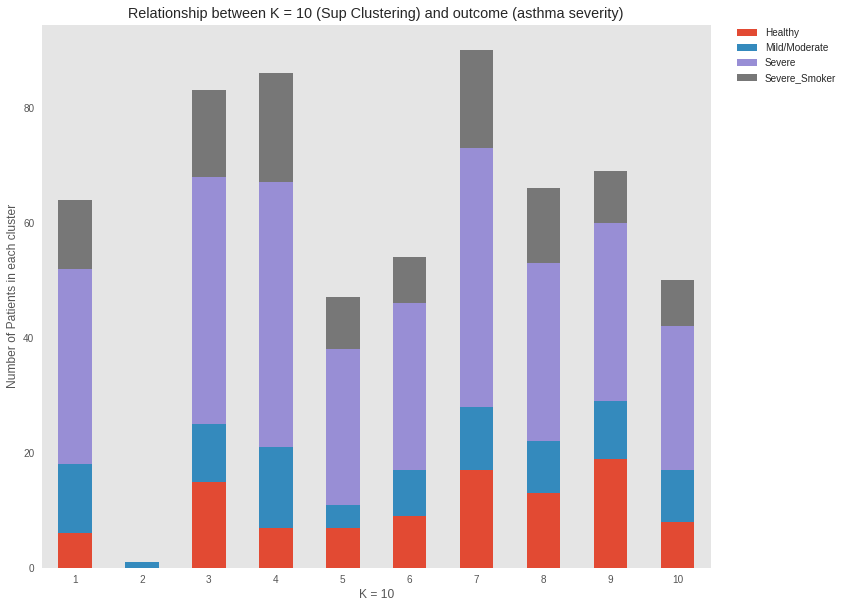

In [74]:
combo_10.plot(kind='bar', figsize = (12,10),  stacked=True)
plt.legend(combo_10.columns,bbox_to_anchor=(1.2,1.01))
plt.grid(b=None)
plt.xlabel('K = 10')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)
plt.title("Relationship between K = 10 (Sup Clustering) and outcome (asthma severity)")
import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/crosstabs")
plt.savefig('crosstab_K10sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

STOP THERE

NOT USED AS OPTIMAL Ks

Relationship between K = 3 (Sup Clustering) and outcome (asthma severity)

In [53]:
combo_3 = pd.crosstab(df_sup['cluster_K_3'], df_sup['cohort'])

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

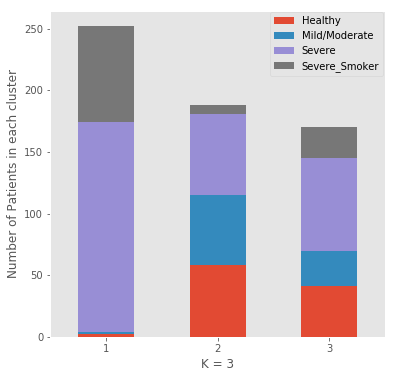

In [54]:
combo_3.plot(kind='bar', figsize = (6,6),  stacked=True)
plt.legend(combo_3.columns,bbox_to_anchor=(1.01,1.01))
plt.grid(b=None)
plt.xlabel('K = 3')
plt.ylabel('Number of Patients in each cluster')
degrees = 0
plt.xticks(rotation=degrees)

Relationship between K = 4 (Sup Clustering) and outcome (asthma severity)

In [56]:
combo_4 = pd.crosstab(df_sup['cluster_K_4'], df_sup['cohort'])

SHAP PLOT CLUSTER 3

In [51]:
shap.summary_plot(shap_values_sup_K11[2], df_sup_copy, plot_type="bar", plot_size=(15, 10),color = "orange",show=False)
ax = plt.gca()
plt.title("Feature importance plot for supervised cluster 3")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust3_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

IndexError: list index out of range

SHAP PLOT CLUSTER 4

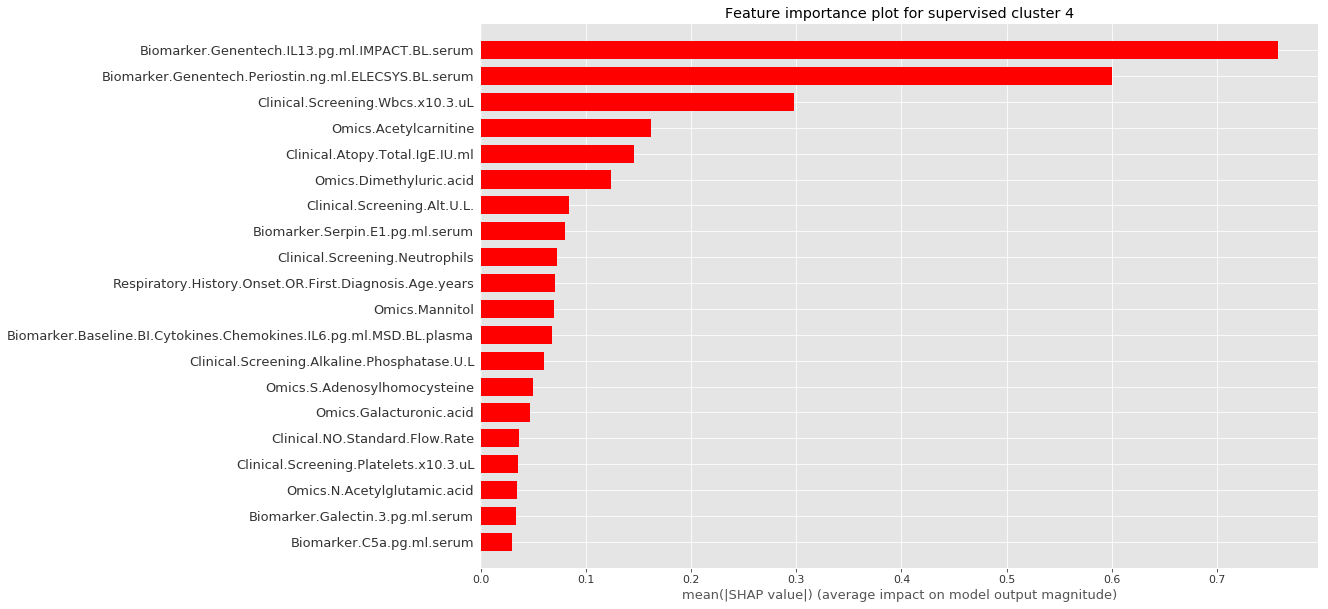

In [32]:
shap.summary_plot(shap_values_sup_K4[3], df_sup_copy, plot_type="bar", plot_size=(15, 10),color = "red",show=False)
ax = plt.gca()
plt.title("Feature importance plot for supervised cluster 4")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_SUP")
plt.savefig('shap_plot_clust4_sup.pdf',format='pdf', dpi=1000, bbox_inches='tight')

APPEND CLUSTERS RESULTS TO DF_SUP FOR K=4

In [35]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Columns: 119 entries, Unnamed: 0 to cluster_K_2
dtypes: float64(102), int64(3), object(14)
memory usage: 567.2+ KB


In [40]:
df_sup.head(5)

,Unnamed: 0,Biomarker.C5a.pg.ml.serum,Biomarker.CD40L.pg.ml.serum,Biomarker.DPPIV.pg.ml.serum,Biomarker.Galectin.3.pg.ml.serum,Biomarker.IL.18.pg.ml.serum,Biomarker.IL.1alpha.pg.ml.serum,Biomarker.IL.6Ralpha.pg.ml.serum,Biomarker.LBP.pg.ml.serum,Biomarker.MCP.4.pg.ml.serum,Biomarker.MMP.3.pg.ml.serum,Biomarker.RAGE.pg.ml.serum,Biomarker.SHBG.pg.ml.serum,Biomarker.Serpin.E1.pg.ml.serum,Biomarker.alpha1.microglobulin.pg.ml.serum,Biomarker.CCL17.pg.ml.MSD.BL.plasma,Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma,Biomarker.Baseline.BI.Cytokines.Chemokines.IL6.pg.ml.MSD.BL.plasma,Biomarker.MCP1.pg.ml.MSD.BL.plasma,Biomarker.MIP1b.pg.ml.MSD.BL.plasma,Biomarker.TNFa.pg.ml.MSD.BL.plasma,Biomarker.Genentech.CCL18.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.IL13.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.Periostin.ng.ml.ELECSYS.BL.serum,Biomarker.Karolinska.hsCRP.hCRP.mg.L,Clinical.Atopy.Total.IgE.IU.ml,Clinical.NO.Standard.Flow.Rate,Clinical.Screening.Albumin.g.dL,Clinical.Screening.Alkaline.Phosphatase.U.L,Clinical.Screening.Alt.U.L.,Clinical.Screening.Ast.U.L,Clinical.Screening.Blood.Urea.Nitrogen.mg.dL,Clinical.Screening.Creatinine.umol.L,Clinical.Screening.Gamma.Gt.U.L,Clinical.Screening.Lymphocytes,Clinical.Screening.Monocytes,Clinical.Screening.Neutrophils,Clinical.Screening.Platelets.x10.3.uL,Clinical.Screening.Sodium.mmol.L,Clinical.Screening.Total.Bilirubin.umol.L,Clinical.Screening.Total.Protein.g.dL,Clinical.Screening.Wbcs.x10.3.uL,Clinical.Screening.eosinophils.x10.3.uL,Clinical.Screening.lymphocytes.x10.3.uL,Clinical.FEF.25.75.Absolute.Change.L.sec,Clinical.FEV1.FVC.Ratio.Predicted.LLN,Clinical.FVC.Absolute.Change.L,Clinical.Baseline.PEF,Clinical.Screening.Diastolic.Blood.Pressure,Clinical.Screening.Heart.Rate,Clinical.Screening.Respiratory.Rate,Clinical.Screening.Systolic.Blood.Pressure,Demographic.Age,Exacerbation.Per.Year.,Omics.dehydroTXB2.ng.mmolC,Omics.dinor.11.B.PGF2a.ng.mmolC,Omics.dinor.8.isoPGF2a.ng.mmolC,Omics.dinor.TXB2.ng.mmolC,Omics.isoPGF2a.ng.mmolC,Omics.LTE4.ng.mmolC,Omics.PGF2a.ng.mmolC,Omics.tetranorPGDM.ng.mmolC,Omics.tetranorPGEM.ng.mmolC,Omics.Trimethyluric.acid,Omics.Dimethyluric.acid,Omics.Methyluric.acid,Omics.Methylxanthine,Omics.Acetylamino.6.formylamino.3.methyluracil,Omics.Acetylcarnitine,Omics.Carnitine,Omics.Galacturonic.acid,Omics.Glutamine,Omics.Guanine,Omics.Histidine,Omics.Kynurenic.acid,Omics.Maltose,Omics.Mannitol,Omics.Methionine,Omics.Methylthioadenosine,Omics.N.Acetylcarnosine,Omics.N.Acetylglutamic.acid,Omics.N.Acetylputrescine,Omics.N.Methyl.D.aspartic.acid,Omics.N.Methylhistamine,Omics.Pipecolic.acid,Omics.Propionylcarnitine,Omics.S.Adenosylhomocysteine,Omics.Saccharopine,Omics.Sarcosine,Omics.Serine,Omics.Serotonin,Omics.Sucrose,Omics.Uracil,Omics.Xylose,Questionnaires.ACQ.FEV1.Precentage,Questionnaires.AQLQ.Emotional.Total.Imputed,Questionnaires.ESS.Total.Imputed,Questionnaires.HADS.Anxiety.Total.Imputed,Questionnaires.HADS.Depression.Total.Imputed,Questionnaires.SNOT.Total.Imputed,Body.Mass.Index.kg.m2,Height.cm,Respiratory.History.Onset.OR.First.Diagnosis.Age.years,Omics.Proteomics.Serum,Questions.Screening.Asthma.Father,Questions.Screening.Hay.Fever.Mother,Questions.Screening.Inflammatory.Disease.Father,Hay.Fever.Diagnosed,Non.Allergic.Rhinitis.Diagnosed,Parental.Asthma,Clinical.Screening.Haematology.Not.Done,cohort,cluster_K_6,Healthy,MildModerate,Severe,Severe_Smoker,Severe_asthma,cluster_K_2
0,A_005,0.229508,0.333360,0.517148,0.350924,0.192343,0.500000,0.347316,0.303933,0.243902,0.051612,0.361961,0.082350,0.265279,0.440303,0.051313,0.107015,0.0,0.414110,0.084239,0.50,0.256313,0.0,0.296610,0.000000,0.038614,0.143564,0.000000,0.252101,0.189189,0.160584,0.250000,0.276786,0.477444,0.666667,0.266667,0.322581,0.246231,0.666667,0.147059,0.8,0.3125,0,0.50,0.202703,0.384615,0.455882,0.689655,0.523810,0.120482,0.157895,0.813084,0.750000,0.0000,0.017241,0.112903,0.289788,0.027431,0.179348,0.028436,0.289796,0.128900,0.111971,0.273604,0.280313,0.053317,0.541940,0.108712,0.019973,0.084073,0.304488,0

In [39]:
#Rename cluster column with cluster_K_6
df_sup.rename(columns = {'cluster':'cluster_K_6'}, inplace = True)

In [41]:
#Set index aside (Patient ID) as we don't want to include it in K-prototypes (done already)
ID = df_sup['Unnamed: 0'].to_list()
ID= np.asarray(ID)
len(ID)

610

In [42]:
#Append the cluster results for K=4 and save dataframe for future visualization
clust_dict={}
clust=[]
for s, c in zip(ID, cluster_df_sup):
    clust_dict[s]=c
    clust.append(c)
df_sup['cluster_K_4']=clust
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes/Final")
df_sup.to_csv("df_sup_clusters_attached_viz.csv")

VISUALIZATION OF THE CLUSTERS

In [46]:
#Import dataset for viz
df_viz_sup = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/Final/df_sup_clusters_attached_viz.csv', low_memory=False)

In [49]:
df_viz_sup.head(5)

,Unnamed: 0,X,Biomarker.C5a.pg.ml.serum,Biomarker.CD40L.pg.ml.serum,Biomarker.DPPIV.pg.ml.serum,Biomarker.Galectin.3.pg.ml.serum,Biomarker.IL.18.pg.ml.serum,Biomarker.IL.1alpha.pg.ml.serum,Biomarker.IL.6Ralpha.pg.ml.serum,Biomarker.LBP.pg.ml.serum,Biomarker.MCP.4.pg.ml.serum,Biomarker.MMP.3.pg.ml.serum,Biomarker.RAGE.pg.ml.serum,Biomarker.SHBG.pg.ml.serum,Biomarker.Serpin.E1.pg.ml.serum,Biomarker.alpha1.microglobulin.pg.ml.serum,Biomarker.CCL17.pg.ml.MSD.BL.plasma,Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma,Biomarker.Baseline.BI.Cytokines.Chemokines.IL6.pg.ml.MSD.BL.plasma,Biomarker.MCP1.pg.ml.MSD.BL.plasma,Biomarker.MIP1b.pg.ml.MSD.BL.plasma,Biomarker.TNFa.pg.ml.MSD.BL.plasma,Biomarker.Genentech.CCL18.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.IL13.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.Periostin.ng.ml.ELECSYS.BL.serum,Biomarker.Karolinska.hsCRP.hCRP.mg.L,Clinical.Atopy.Total.IgE.IU.ml,Clinical.NO.Standard.Flow.Rate,Clinical.Screening.Albumin.g.dL,Clinical.Screening.Alkaline.Phosphatase.U.L,Clinical.Screening.Alt.U.L.,Clinical.Screening.Ast.U.L,Clinical.Screening.Blood.Urea.Nitrogen.mg.dL,Clinical.Screening.Creatinine.umol.L,Clinical.Screening.Gamma.Gt.U.L,Clinical.Screening.Lymphocytes,Clinical.Screening.Monocytes,Clinical.Screening.Neutrophils,Clinical.Screening.Platelets.x10.3.uL,Clinical.Screening.Sodium.mmol.L,Clinical.Screening.Total.Bilirubin.umol.L,Clinical.Screening.Total.Protein.g.dL,Clinical.Screening.Wbcs.x10.3.uL,Clinical.Screening.eosinophils.x10.3.uL,Clinical.Screening.lymphocytes.x10.3.uL,Clinical.FEF.25.75.Absolute.Change.L.sec,Clinical.FEV1.FVC.Ratio.Predicted.LLN,Clinical.FVC.Absolute.Change.L,Clinical.Baseline.PEF,Clinical.Screening.Diastolic.Blood.Pressure,Clinical.Screening.Heart.Rate,Clinical.Screening.Respiratory.Rate,Clinical.Screening.Systolic.Blood.Pressure,Demographic.Age,Exacerbation.Per.Year.,Omics.dehydroTXB2.ng.mmolC,Omics.dinor.11.B.PGF2a.ng.mmolC,Omics.dinor.8.isoPGF2a.ng.mmolC,Omics.dinor.TXB2.ng.mmolC,Omics.isoPGF2a.ng.mmolC,Omics.LTE4.ng.mmolC,Omics.PGF2a.ng.mmolC,Omics.tetranorPGDM.ng.mmolC,Omics.tetranorPGEM.ng.mmolC,Omics.Trimethyluric.acid,Omics.Dimethyluric.acid,Omics.Methyluric.acid,Omics.Methylxanthine,Omics.Acetylamino.6.formylamino.3.methyluracil,Omics.Acetylcarnitine,Omics.Carnitine,Omics.Galacturonic.acid,Omics.Glutamine,Omics.Guanine,Omics.Histidine,Omics.Kynurenic.acid,Omics.Maltose,Omics.Mannitol,Omics.Methionine,Omics.Methylthioadenosine,Omics.N.Acetylcarnosine,Omics.N.Acetylglutamic.acid,Omics.N.Acetylputrescine,Omics.N.Methyl.D.aspartic.acid,Omics.N.Methylhistamine,Omics.Pipecolic.acid,Omics.Propionylcarnitine,Omics.S.Adenosylhomocysteine,Omics.Saccharopine,Omics.Sarcosine,Omics.Serine,Omics.Serotonin,Omics.Sucrose,Omics.Uracil,Omics.Xylose,Questionnaires.ACQ.FEV1.Precentage,Questionnaires.AQLQ.Emotional.Total.Imputed,Questionnaires.ESS.Total.Imputed,Questionnaires.HADS.Anxiety.Total.Imputed,Questionnaires.HADS.Depression.Total.Imputed,Questionnaires.SNOT.Total.Imputed,Body.Mass.Index.kg.m2,Height.cm,Respiratory.History.Onset.OR.First.Diagnosis.Age.years,Omics.Proteomics.Serum,Questions.Screening.Asthma.Father,Questions.Screening.Hay.Fever.Mother,Questions.Screening.Inflammatory.Disease.Father,Hay.Fever.Diagnosed,Non.Allergic.Rhinitis.Diagnosed,Parental.Asthma,Clinical.Screening.Haematology.Not.Done,cohort,cluster_K_6,Healthy,MildModerate,Severe,Severe_Smoker,Severe_asthma,cluster_K_2,cluster_K_4
Unnamed..0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A_005,1,0,0.229508,0.333360,0.517148,0.350924,0.192343,0.500000,0.347316,0.303933,0.243902,0.051612,0.361961,0.082350,0.265279,0.440303,0.051313,0.107015,0.0,0.414110,0.084239,0.50,0.256313,0.0,0.296610,0.000000,0.038614,0.143564,0.000000,0.252101,0.189189,0.160584,0.250000,0.276786,0.477444,0.666667,0.266667,0.322581,0.246231,0.666667,0.147059,0.8,0.3125,0,0.50,0.202703,0.384615,0.455882,0.689655,0.523810,0.120482,0.157895,0.813084,0.750000,0.0000,0.0172

In [48]:
#Set Unnamed..0 as index of df_viz_sup
df_viz_sup = df_viz_sup.set_index('Unnamed..0')

In [50]:
#Drop a few columns from df
df_sup_outcome = df_viz_sup.drop(['Unnamed: 0','X','Healthy','Severe','Severe_Smoker','Severe_asthma','MildModerate','cluster_K_2','cluster_K_4','cluster_K_6'], axis = 1)

In [59]:
#Check if successful removal
df_sup_outcome.head(5)

,Biomarker.C5a.pg.ml.serum,Biomarker.CD40L.pg.ml.serum,Biomarker.DPPIV.pg.ml.serum,Biomarker.Galectin.3.pg.ml.serum,Biomarker.IL.18.pg.ml.serum,Biomarker.IL.1alpha.pg.ml.serum,Biomarker.IL.6Ralpha.pg.ml.serum,Biomarker.LBP.pg.ml.serum,Biomarker.MCP.4.pg.ml.serum,Biomarker.MMP.3.pg.ml.serum,Biomarker.RAGE.pg.ml.serum,Biomarker.SHBG.pg.ml.serum,Biomarker.Serpin.E1.pg.ml.serum,Biomarker.alpha1.microglobulin.pg.ml.serum,Biomarker.CCL17.pg.ml.MSD.BL.plasma,Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma,Biomarker.Baseline.BI.Cytokines.Chemokines.IL6.pg.ml.MSD.BL.plasma,Biomarker.MCP1.pg.ml.MSD.BL.plasma,Biomarker.MIP1b.pg.ml.MSD.BL.plasma,Biomarker.TNFa.pg.ml.MSD.BL.plasma,Biomarker.Genentech.CCL18.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.IL13.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.Periostin.ng.ml.ELECSYS.BL.serum,Biomarker.Karolinska.hsCRP.hCRP.mg.L,Clinical.Atopy.Total.IgE.IU.ml,Clinical.NO.Standard.Flow.Rate,Clinical.Screening.Albumin.g.dL,Clinical.Screening.Alkaline.Phosphatase.U.L,Clinical.Screening.Alt.U.L.,Clinical.Screening.Ast.U.L,Clinical.Screening.Blood.Urea.Nitrogen.mg.dL,Clinical.Screening.Creatinine.umol.L,Clinical.Screening.Gamma.Gt.U.L,Clinical.Screening.Lymphocytes,Clinical.Screening.Monocytes,Clinical.Screening.Neutrophils,Clinical.Screening.Platelets.x10.3.uL,Clinical.Screening.Sodium.mmol.L,Clinical.Screening.Total.Bilirubin.umol.L,Clinical.Screening.Total.Protein.g.dL,Clinical.Screening.Wbcs.x10.3.uL,Clinical.Screening.eosinophils.x10.3.uL,Clinical.Screening.lymphocytes.x10.3.uL,Clinical.FEF.25.75.Absolute.Change.L.sec,Clinical.FEV1.FVC.Ratio.Predicted.LLN,Clinical.FVC.Absolute.Change.L,Clinical.Baseline.PEF,Clinical.Screening.Diastolic.Blood.Pressure,Clinical.Screening.Heart.Rate,Clinical.Screening.Respiratory.Rate,Clinical.Screening.Systolic.Blood.Pressure,Demographic.Age,Exacerbation.Per.Year.,Omics.dehydroTXB2.ng.mmolC,Omics.dinor.11.B.PGF2a.ng.mmolC,Omics.dinor.8.isoPGF2a.ng.mmolC,Omics.dinor.TXB2.ng.mmolC,Omics.isoPGF2a.ng.mmolC,Omics.LTE4.ng.mmolC,Omics.PGF2a.ng.mmolC,Omics.tetranorPGDM.ng.mmolC,Omics.tetranorPGEM.ng.mmolC,Omics.Trimethyluric.acid,Omics.Dimethyluric.acid,Omics.Methyluric.acid,Omics.Methylxanthine,Omics.Acetylamino.6.formylamino.3.methyluracil,Omics.Acetylcarnitine,Omics.Carnitine,Omics.Galacturonic.acid,Omics.Glutamine,Omics.Guanine,Omics.Histidine,Omics.Kynurenic.acid,Omics.Maltose,Omics.Mannitol,Omics.Methionine,Omics.Methylthioadenosine,Omics.N.Acetylcarnosine,Omics.N.Acetylglutamic.acid,Omics.N.Acetylputrescine,Omics.N.Methyl.D.aspartic.acid,Omics.N.Methylhistamine,Omics.Pipecolic.acid,Omics.Propionylcarnitine,Omics.S.Adenosylhomocysteine,Omics.Saccharopine,Omics.Sarcosine,Omics.Serine,Omics.Serotonin,Omics.Sucrose,Omics.Uracil,Omics.Xylose,Questionnaires.ACQ.FEV1.Precentage,Questionnaires.AQLQ.Emotional.Total.Imputed,Questionnaires.ESS.Total.Imputed,Questionnaires.HADS.Anxiety.Total.Imputed,Questionnaires.HADS.Depression.Total.Imputed,Questionnaires.SNOT.Total.Imputed,Body.Mass.Index.kg.m2,Height.cm,Respiratory.History.Onset.OR.First.Diagnosis.Age.years,Omics.Proteomics.Serum,Questions.Screening.Asthma.Father,Questions.Screening.Hay.Fever.Mother,Questions.Screening.Inflammatory.Disease.Father,Hay.Fever.Diagnosed,Non.Allergic.Rhinitis.Diagnosed,Parental.Asthma,Clinical.Screening.Haematology.Not.Done,cohort
Unnamed..0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A_005,0.229508,0.333360,0.517148,0.350924,0.192343,0.500000,0.347316,0.303933,0.243902,0.051612,0.361961,0.082350,0.265279,0.440303,0.051313,0.107015,0.0,0.414110,0.084239,0.50,0.256313,0.0,0.296610,0.000000,0.038614,0.143564,0.000000,0.252101,0.189189,0.160584,0.250000,0.276786,0.477444,0.666667,0.266667,0.322581,0.246231,0.666667,0.147059,0.8,0.3125,0,0.50,0.202703,0.384615,0.455882,0.689655,0.523810,0.120482,0.157895,0.813084,0.750000,0.0000,0.017241,0.112903,0.289788,0.027431,0.179348,0.028436,0.289796,0.128900,0.111971,0.273604,0.280313,0.053317,0.541940,0.108712

In [52]:
#Label encode severity outcome
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_sup_outcome['cohort'] = le.fit_transform(df_sup_outcome['cohort'])

In [55]:
#Check variable types for specific columns using:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_sup_outcome.iloc[:,102:110].dtypes

Omics.Proteomics.Serum                              object
Questions.Screening.Asthma.Father                   object
Questions.Screening.Hay.Fever.Mother                object
Questions.Screening.Inflammatory.Disease.Father     object
Hay.Fever.Diagnosed                                 object
Non.Allergic.Rhinitis.Diagnosed                     object
Parental.Asthma                                     object
Clinical.Screening.Haematology.Not.Done            float64
dtype: object

In [56]:
#Convert range of variables 175-362 to object 
df_sup_outcome.iloc[:,102:110]=df_sup_outcome.iloc[:,102:110].astype('str')

In [57]:
#Label encode categorical variables
from sklearn import preprocessing
for c in df_sup_outcome.iloc[:,102:110]:
    le = preprocessing.LabelEncoder()
    df_sup_outcome[c] = le.fit_transform(np.array(df_sup_outcome[c]).reshape(-1, 1))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [58]:
#Standardize using yeo-johnson transformation for all variables in df to be scaled identically
from sklearn.preprocessing import PowerTransformer
for c in df_sup_outcome.iloc[:,102:110]:
    pt = PowerTransformer()
    df_sup_outcome[c] =  pt.fit_transform(np.array(df_sup_outcome[c]).reshape(-1, 1))

In [60]:
#Visualize supervised clustering per severity group
import umap
fit_outcome_sup = umap.UMAP()
%time embedding_sup = fit_outcome_sup.fit_transform(df_sup_outcome)

CPU times: user 49.3 s, sys: 146 ms, total: 49.5 s
Wall time: 14.8 s


In [61]:
classes = ['Healthy','Mild/Moderate','Severe','Severe_Smoker']

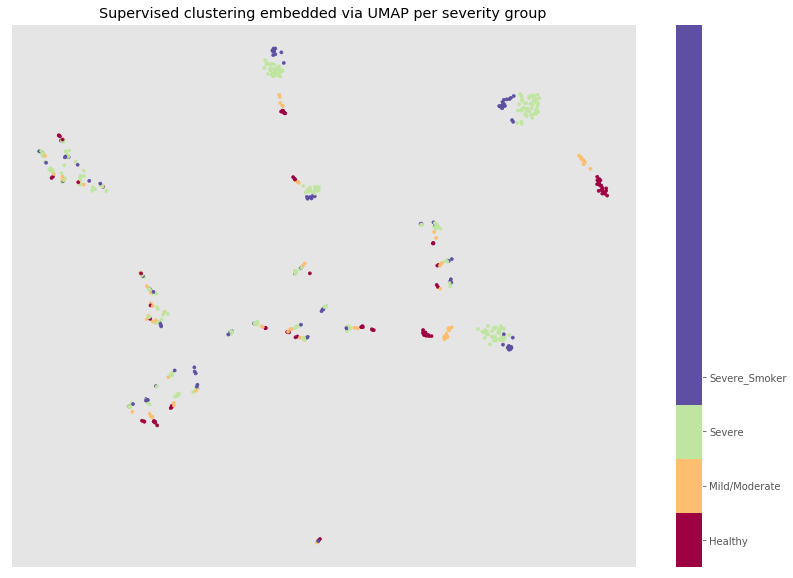

In [62]:
fig,ax = plt.subplots(1,figsize=(14,10))
plt.scatter(*embedding_sup.T, s = 10, c = df_sup_outcome['cohort'], cmap = 'Spectral', alpha =1.0)
plt.setp(ax,xticks = [], yticks = [])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(classes)
plt.title('Supervised clustering embedded via UMAP per severity group')
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/")
plt.savefig('Supervised_clustering_severity_umap.pdf',format='pdf', dpi=1000, bbox_inches='tight')

REITERATE BUT WITH THE 4 CLUSTERS YOU DEFINED

In [63]:
#Drop a few columns from df
df_sup_cluster = df_viz_sup.drop(['Unnamed: 0','X','Healthy','Severe','Severe_Smoker','Severe_asthma','MildModerate','cluster_K_2','cohort','cluster_K_6'], axis = 1)

In [68]:
#Check variable types for specific columns using:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_sup_cluster.iloc[:,102:110].dtypes

Omics.Proteomics.Serum                              object
Questions.Screening.Asthma.Father                   object
Questions.Screening.Hay.Fever.Mother                object
Questions.Screening.Inflammatory.Disease.Father     object
Hay.Fever.Diagnosed                                 object
Non.Allergic.Rhinitis.Diagnosed                     object
Parental.Asthma                                     object
Clinical.Screening.Haematology.Not.Done            float64
dtype: object

In [69]:
#Convert range of variables 175-362 to object 
df_sup_cluster.iloc[:,102:110]=df_sup_cluster.iloc[:,102:110].astype('str')

#Label encode categorical variables
from sklearn import preprocessing
for c in df_sup_cluster.iloc[:,102:110]:
    le = preprocessing.LabelEncoder()
    df_sup_cluster[c] = le.fit_transform(np.array(df_sup_cluster[c]).reshape(-1, 1))
    
#Standardize using yeo-johnson transformation for all variables in df to be scaled identically
from sklearn.preprocessing import PowerTransformer
for c in df_sup_cluster.iloc[:,102:110]:
    pt = PowerTransformer()
    df_sup_cluster[c] =  pt.fit_transform(np.array(df_sup_cluster[c]).reshape(-1, 1))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [70]:
df_sup_cluster.head(5)

,Biomarker.C5a.pg.ml.serum,Biomarker.CD40L.pg.ml.serum,Biomarker.DPPIV.pg.ml.serum,Biomarker.Galectin.3.pg.ml.serum,Biomarker.IL.18.pg.ml.serum,Biomarker.IL.1alpha.pg.ml.serum,Biomarker.IL.6Ralpha.pg.ml.serum,Biomarker.LBP.pg.ml.serum,Biomarker.MCP.4.pg.ml.serum,Biomarker.MMP.3.pg.ml.serum,Biomarker.RAGE.pg.ml.serum,Biomarker.SHBG.pg.ml.serum,Biomarker.Serpin.E1.pg.ml.serum,Biomarker.alpha1.microglobulin.pg.ml.serum,Biomarker.CCL17.pg.ml.MSD.BL.plasma,Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma,Biomarker.Baseline.BI.Cytokines.Chemokines.IL6.pg.ml.MSD.BL.plasma,Biomarker.MCP1.pg.ml.MSD.BL.plasma,Biomarker.MIP1b.pg.ml.MSD.BL.plasma,Biomarker.TNFa.pg.ml.MSD.BL.plasma,Biomarker.Genentech.CCL18.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.IL13.pg.ml.IMPACT.BL.serum,Biomarker.Genentech.Periostin.ng.ml.ELECSYS.BL.serum,Biomarker.Karolinska.hsCRP.hCRP.mg.L,Clinical.Atopy.Total.IgE.IU.ml,Clinical.NO.Standard.Flow.Rate,Clinical.Screening.Albumin.g.dL,Clinical.Screening.Alkaline.Phosphatase.U.L,Clinical.Screening.Alt.U.L.,Clinical.Screening.Ast.U.L,Clinical.Screening.Blood.Urea.Nitrogen.mg.dL,Clinical.Screening.Creatinine.umol.L,Clinical.Screening.Gamma.Gt.U.L,Clinical.Screening.Lymphocytes,Clinical.Screening.Monocytes,Clinical.Screening.Neutrophils,Clinical.Screening.Platelets.x10.3.uL,Clinical.Screening.Sodium.mmol.L,Clinical.Screening.Total.Bilirubin.umol.L,Clinical.Screening.Total.Protein.g.dL,Clinical.Screening.Wbcs.x10.3.uL,Clinical.Screening.eosinophils.x10.3.uL,Clinical.Screening.lymphocytes.x10.3.uL,Clinical.FEF.25.75.Absolute.Change.L.sec,Clinical.FEV1.FVC.Ratio.Predicted.LLN,Clinical.FVC.Absolute.Change.L,Clinical.Baseline.PEF,Clinical.Screening.Diastolic.Blood.Pressure,Clinical.Screening.Heart.Rate,Clinical.Screening.Respiratory.Rate,Clinical.Screening.Systolic.Blood.Pressure,Demographic.Age,Exacerbation.Per.Year.,Omics.dehydroTXB2.ng.mmolC,Omics.dinor.11.B.PGF2a.ng.mmolC,Omics.dinor.8.isoPGF2a.ng.mmolC,Omics.dinor.TXB2.ng.mmolC,Omics.isoPGF2a.ng.mmolC,Omics.LTE4.ng.mmolC,Omics.PGF2a.ng.mmolC,Omics.tetranorPGDM.ng.mmolC,Omics.tetranorPGEM.ng.mmolC,Omics.Trimethyluric.acid,Omics.Dimethyluric.acid,Omics.Methyluric.acid,Omics.Methylxanthine,Omics.Acetylamino.6.formylamino.3.methyluracil,Omics.Acetylcarnitine,Omics.Carnitine,Omics.Galacturonic.acid,Omics.Glutamine,Omics.Guanine,Omics.Histidine,Omics.Kynurenic.acid,Omics.Maltose,Omics.Mannitol,Omics.Methionine,Omics.Methylthioadenosine,Omics.N.Acetylcarnosine,Omics.N.Acetylglutamic.acid,Omics.N.Acetylputrescine,Omics.N.Methyl.D.aspartic.acid,Omics.N.Methylhistamine,Omics.Pipecolic.acid,Omics.Propionylcarnitine,Omics.S.Adenosylhomocysteine,Omics.Saccharopine,Omics.Sarcosine,Omics.Serine,Omics.Serotonin,Omics.Sucrose,Omics.Uracil,Omics.Xylose,Questionnaires.ACQ.FEV1.Precentage,Questionnaires.AQLQ.Emotional.Total.Imputed,Questionnaires.ESS.Total.Imputed,Questionnaires.HADS.Anxiety.Total.Imputed,Questionnaires.HADS.Depression.Total.Imputed,Questionnaires.SNOT.Total.Imputed,Body.Mass.Index.kg.m2,Height.cm,Respiratory.History.Onset.OR.First.Diagnosis.Age.years,Omics.Proteomics.Serum,Questions.Screening.Asthma.Father,Questions.Screening.Hay.Fever.Mother,Questions.Screening.Inflammatory.Disease.Father,Hay.Fever.Diagnosed,Non.Allergic.Rhinitis.Diagnosed,Parental.Asthma,Clinical.Screening.Haematology.Not.Done,cluster_K_4
Unnamed..0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A_005,0.229508,0.333360,0.517148,0.350924,0.192343,0.500000,0.347316,0.303933,0.243902,0.051612,0.361961,0.082350,0.265279,0.440303,0.051313,0.107015,0.0,0.414110,0.084239,0.50,0.256313,0.0,0.296610,0.000000,0.038614,0.143564,0.000000,0.252101,0.189189,0.160584,0.250000,0.276786,0.477444,0.666667,0.266667,0.322581,0.246231,0.666667,0.147059,0.8,0.3125,0,0.50,0.202703,0.384615,0.455882,0.689655,0.523810,0.120482,0.157895,0.813084,0.750000,0.0000,0.017241,0.112903,0.289788,0.027431,0.179348,0.028436,0.289796,0.128900,0.111971,0.273604,0.280313,0.053317,0.541940,0.1

In [74]:
#Drop a few columns from df
df_sup_cluster_2 = df_sup_cluster.drop(['cluster_K_4'], axis = 1)

In [78]:
#Visualize unsupervised clustering with points belonging to each cluster
fit_cluster_sup = umap.UMAP()
%time embedding_clust_sup = fit_cluster_sup.fit_transform(df_sup_cluster_2,y=df_sup_outcome['cohort'])

CPU times: user 19.6 s, sys: 30 ms, total: 19.6 s
Wall time: 5.14 s


In [84]:
classes_2 = ['Cluster1','Cluster2','Cluster3','Cluster4']

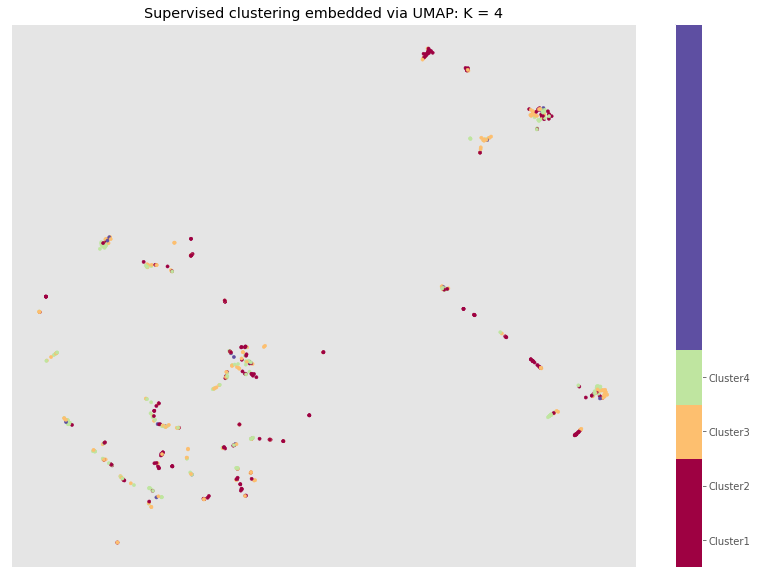

In [86]:
fig,ax = plt.subplots(1,figsize=(14,10))
plt.scatter(*embedding_clust_sup.T, s = 10, c = df_sup_cluster['cluster_K_4'], cmap = 'Spectral', alpha =1.0)
plt.setp(ax,xticks = [], yticks = [])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(classes_2)
plt.title('Supervised clustering embedded via UMAP: K = 4')
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/")
plt.savefig('Supervised_clustering_clusters_umap.pdf',format='pdf', dpi=1000, bbox_inches='tight')